# **Swiss houses Final Project**: Analyzing Environmental Impact on Apartment Quality

## Loading libraries and data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


#### _Note_
_The original dataset used in this project is very large, which prevents us from uploading it directly to this GitHub repository. You can access the dataset through the following link: [Swiss Houses Dataset on Zenodo](https://zenodo.org/records/7070952#.Y0mACy0RqO0)._


In [62]:
df1 = pd.read_csv('simulations.csv')


## First view to the data

In [63]:
df1.head()

,apartment_id,area_id,building_id,connectivity_balcony_distance_max,connectivity_balcony_distance_mean,connectivity_balcony_distance_median,connectivity_balcony_distance_min,connectivity_balcony_distance_p20,connectivity_balcony_distance_p80,connectivity_balcony_distance_stddev,connectivity_bathroom_distance_max,connectivity_bathroom_distance_mean,connectivity_bathroom_distance_median,connectivity_bathroom_distance_min,connectivity_bathroom_distance_p20,connectivity_bathroom_distance_p80,connectivity_bathroom_distance_stddev,connectivity_betweenness_centrality_max,connectivity_betweenness_centrality_mean,connectivity_betweenness_centrality_median,connectivity_betweenness_centrality_min,connectivity_betweenness_centrality_p20,connectivity_betweenness_centrality_p80,connectivity_betweenness_centrality_stddev,connectivity_closeness_centrality_max,connectivity_closeness_centrality_mean,connectivity_closeness_centrality_median,connectivity_closeness_centrality_min,connectivity_closeness_centrality_p20,connectivity_closeness_centrality_p80,connectivity_closeness_centrality_stddev,connectivity_eigen_centrality_max,connectivity_eigen_centrality_mean,connectivity_eigen_centrality_median,connectivity_eigen_centrality_min,connectivity_eigen_centrality_p20,connectivity_eigen_centrality_p80,connectivity_eigen_centrality_stddev,connectivity_entrance_door_distance_max,connectivity_entrance_door_distance_mean,connectivity_entrance_door_distance_median,connectivity_entrance_door_distance_min,connectivity_entrance_door_distance_p20,connectivity_entrance_door_distance_p80,connectivity_entrance_door_distance_stddev,connectivity_kitchen_distance_max,connectivity_kitchen_distance_mean,connectivity_kitchen_distance_median,connectivity_kitchen_distance_min,connectivity_kitchen_distance_p20,connectivity_kitchen_distance_p80,connectivity_kitchen_distance_stddev,connectivity_living_dining_distance_max,connectivity_living_dining_distance_mean,connectivity_living_dining_distance_median,connectivity_living_dining_distance_min,connectivity_living_dining_distance_p20,connectivity_living_dining_distance_p80,connectivity_living_dining_distance_stddev,connectivity_loggia_distance_max,connectivity_loggia_distance_mean,connectivity_loggia_distance_median,connectivity_loggia_distance_min,connectivity_loggia_distance_p20,connectivity_loggia_distance_p80,connectivity_loggia_distance_stddev,connectivity_room_distance_max,connectivity_room_distance_mean,connectivity_room_distance_median,connectivity_room_distance_min,connectivity_room_distance_p20,connectivity_room_distance_p80,connectivity_room_distance_stddev,floor_has_elevator,floor_id,floor_number,layout_area,layout_area_type,layout_biggest_rectangle_length,layout_biggest_rectangle_width,layout_compactness,layout_connects_to_bathroom,layout_connects_to_private_outdoor,layout_door_perimeter,layout_has_bathtub,layout_has_entrance_door,layout_has_shower,layout_has_sink,layout_has_stairs,layout_has_toilet,layout_is_navigable,layout_mean_walllengths,layout_net_area,layout_number_of_doors,layout_number_of_windows,layout_open_perimeter,layout_perimeter,layout_railing_perimeter,layout_room_count,layout_std_walllengths,layout_window_perimeter,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,site_id,sun_201803210800_max,sun_201803210800_mean,sun_201803210800_median,sun_201803210800_min,sun_201803210800_p20,sun_201803210800_p80,sun_201803210800_stddev,sun_201803211000_max,sun_201803211000_mean,sun_201803211000_median,sun_201803211000_min,sun_201803211000_p20,sun_201803211000_p80,sun_201803211000_stddev,sun_201803211200_max,sun_201803211200_mean,sun_201803211200_median,sun_201803211200_min,sun_201803211200_p20,sun_201803211200_p80,sun_201803211200_stddev,sun_201803211400_max,sun_201803211400_mean,sun_201803211400_median,sun_201803211400_min,sun_201803211400_p20,sun_201803211400_p80,sun_201803211400_stddev,sun_201803211600_max,sun_201803211600_mean,sun_201803211600_median,sun_201803211600_min,sun_2018032

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347583 entries, 0 to 347582
Columns: 367 entries, apartment_id to window_noise_train_night_min
dtypes: bool(10), float64(346), int64(9), object(2)
memory usage: 950.0+ MB


In [65]:
df1.shape

(347583, 367)

In [66]:
df1['apartment_id'].nunique()

42207

In [67]:
df1['area_id'].nunique()

201184

In [68]:
df1['building_id'].nunique()

3093

In [69]:
df1.isnull().sum()

apartment_id                              0
area_id                                   0
building_id                               0
connectivity_balcony_distance_max     60744
connectivity_balcony_distance_mean    60744
                                      ...  
window_noise_traffic_night_min            0
window_noise_train_day_max                0
window_noise_train_day_min                0
window_noise_train_night_max              0
window_noise_train_night_min              0
Length: 367, dtype: int64

In [70]:
df1.isnull().sum()[df1.isnull().sum() > 0].sort_values(ascending=False)

connectivity_loggia_distance_median           318227
connectivity_loggia_distance_stddev           318227
connectivity_loggia_distance_max              318227
connectivity_loggia_distance_min              318227
connectivity_loggia_distance_p20              318227
                                               ...  
connectivity_entrance_door_distance_p80          158
connectivity_entrance_door_distance_stddev       158
connectivity_entrance_door_distance_median       158
layout_biggest_rectangle_length                   83
layout_biggest_rectangle_width                    83
Length: 328, dtype: int64

In [71]:
df1.duplicated().sum()

0

In our dataset, we have 367 columns containing information that describes each apartment room.

## Selecting data

We will select columns related to the environmental quality of the apartments. These columns contain information about the views, sunlight, and noise.

In [72]:
words_col = ['apartment_id', 'area_id', 'building_id', 'view', 'sun', 'noise']

df1_env = df1[df1.columns[df1.columns.str.contains('|'.join(words_col))]]

In [73]:
df1_env.head()

,apartment_id,area_id,building_id,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,sun_201803210800_max,sun_201803210800_mean,sun_201803210800_median,sun_201803210800_min,sun_201803210800_p20,sun_201803210800_p80,sun_201803210800_stddev,sun_201803211000_max,sun_201803211000_mean,sun_201803211000_median,sun_201803211000_min,sun_201803211000_p20,sun_201803211000_p80,sun_201803211000_stddev,sun_201803211200_max,sun_201803211200_mean,sun_201803211200_median,sun_201803211200_min,sun_201803211200_p20,sun_201803211200_p80,sun_201803211200_stddev,sun_201803211400_max,sun_201803211400_mean,sun_201803211400_median,sun_201803211400_min,sun_201803211400_p20,sun_201803211400_p80,sun_201803211400_stddev,sun_201803211600_max,sun_201803211600_mean,sun_201803211600_median,sun_201803211600_min,sun_201803211600_p20,sun_201803211600_p80,sun_201803211600_stddev,sun_201803211800_max,sun_201803211800_mean,sun_201803211800_median,sun_201803211800_min,sun_201803211800_p20,sun_201803211800_p80,sun_201803211800_stddev,sun_201806210600_max,sun_201806210600_mean,sun_201806210600_median,sun_201806210600_min,sun_201806210600_p20,sun_201806210600_p80,sun_201806210600_stddev,sun_201806210800_max,sun_201806210800_mean,sun_201806210800_median,sun_201806210800_min,sun_201806210800_p20,sun_201806210800_p80,sun_201806210800_stddev,sun_201806211000_max,sun_201806211000_mean,sun_201806211000_median,sun_201806211000_min,sun_201806211000_p20,sun_201806211000_p80,sun_201806211000_stddev,sun_201806211200_max,sun_201806211200_mean,sun_201806211200_median,sun_201806211200_min,sun_201806211200_p20,sun_201806211200_p80,sun_201806211200_stddev,sun_201806211400_max,sun_201806211400_mean,sun_201806211400_median,sun_201806211400_min,sun_201806211400_p20,sun_201806211400_p80,sun_201806211400_stddev,sun_201806211600_max,sun_201806211600_mean,sun_201806211600_median,sun_201806211600_min,sun_201806211600_p20,sun_201806211600_p80,sun_201806211600_stddev,sun_201806211800_max,sun_201806211800_mean,sun_201806211800_median,sun_201806211800_min,sun_201806211800_p20,sun_201806211800_p80,sun_201806211800_stddev,sun_201806212000_max,sun_201806212000_mean,sun_201806212000_median,sun_201806212000_min,sun_201806212000_p20,sun_201806212000_p80,sun_201806212000_stddev,sun_201812211000_max,sun_201812211000_mean,sun_201812211000_median,sun_201812211000_min,sun_201812211000_p20,sun_201812211000_p80,sun_201812211000_stddev,sun_201812211200_max,sun_201812211200_mean,sun_201812211200_median,sun_201812211200_min,sun_201812211200_p20,sun_201812211200_p80,sun_201812211200_stddev,sun_201812211400_max,sun_201812211400_mean,sun_201812211400_median,sun_201812211400_min,sun_201812211400_p20,sun_201812211400_p80,sun_201812211400_stddev,sun_201812211600_max,sun_201812211600_mean,sun_201812211600_median,sun_201812211600_min,sun_201812211600_p20,sun_201812211600_p80,sun_201812211600_stddev,view_buildings_max,view_buildings_mean,view_buildings_median,view_buildings_min,view_buildings_p20,view_buildings_p80,view_buildings_stddev,view_greenery_max,view_greenery_mean,view_greenery_median,view_greenery_min,view_greenery_p20,view_greenery_p80,view_greenery_stddev,view_ground_max,view_ground_mean,view_ground_median,view_ground_min,view_ground_p20,view_ground_p80,view_ground_stddev,view_highways_max,view_highways_mean,view_highways_median,view_highways_min,view_highways_p20,view_highways_p80,view_highways_stddev,view_isovist_max,view_isovist_mean,view_isovist_median,view_isovist_min,view_isovist_p20,view_isovist_p80,view_isovist_stddev,view_mountains_class_2_max,view_mountains_class_2_mean,view_mountains_class_2_median,view_mountains_class_2_min,view_mountains_class_2_p20,view_mountains_class_2_p80,view_mountains_class_2_stddev,view_mountains_class_3_max,view_mountains_class_3_mean,view_mountains_class_3_median,view_mountains_class_3_min,view_mountains_class_3_p20,view_mountains_class_3_p80,view_mountains_class_3_stddev,view_mountains_class_4_max,view_mountains_class_4_mean,view_mountains_class_4_m

In [74]:
df1_env.shape

(347583, 267)

In [75]:
df1_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347583 entries, 0 to 347582
Columns: 267 entries, apartment_id to window_noise_train_night_min
dtypes: float64(264), int64(2), object(1)
memory usage: 708.0+ MB


In [76]:
pd.set_option('display.max_columns', None)

In [77]:
words_quit_col = ['stddev', 'p80', 'p20', 'median']

df1_env_2 = df1_env[df1_env.columns[~df1_env.columns.str.contains('|'.join(words_quit_col))]]

In [78]:
df1_env_2.head()

,apartment_id,area_id,building_id,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,sun_201803210800_max,sun_201803210800_mean,sun_201803210800_min,sun_201803211000_max,sun_201803211000_mean,sun_201803211000_min,sun_201803211200_max,sun_201803211200_mean,sun_201803211200_min,sun_201803211400_max,sun_201803211400_mean,sun_201803211400_min,sun_201803211600_max,sun_201803211600_mean,sun_201803211600_min,sun_201803211800_max,sun_201803211800_mean,sun_201803211800_min,sun_201806210600_max,sun_201806210600_mean,sun_201806210600_min,sun_201806210800_max,sun_201806210800_mean,sun_201806210800_min,sun_201806211000_max,sun_201806211000_mean,sun_201806211000_min,sun_201806211200_max,sun_201806211200_mean,sun_201806211200_min,sun_201806211400_max,sun_201806211400_mean,sun_201806211400_min,sun_201806211600_max,sun_201806211600_mean,sun_201806211600_min,sun_201806211800_max,sun_201806211800_mean,sun_201806211800_min,sun_201806212000_max,sun_201806212000_mean,sun_201806212000_min,sun_201812211000_max,sun_201812211000_mean,sun_201812211000_min,sun_201812211200_max,sun_201812211200_mean,sun_201812211200_min,sun_201812211400_max,sun_201812211400_mean,sun_201812211400_min,sun_201812211600_max,sun_201812211600_mean,sun_201812211600_min,view_buildings_max,view_buildings_mean,view_buildings_min,view_greenery_max,view_greenery_mean,view_greenery_min,view_ground_max,view_ground_mean,view_ground_min,view_highways_max,view_highways_mean,view_highways_min,view_isovist_max,view_isovist_mean,view_isovist_min,view_mountains_class_2_max,view_mountains_class_2_mean,view_mountains_class_2_min,view_mountains_class_3_max,view_mountains_class_3_mean,view_mountains_class_3_min,view_mountains_class_4_max,view_mountains_class_4_mean,view_mountains_class_4_min,view_mountains_class_5_max,view_mountains_class_5_mean,view_mountains_class_5_min,view_mountains_class_6_max,view_mountains_class_6_mean,view_mountains_class_6_min,view_pedestrians_max,view_pedestrians_mean,view_pedestrians_min,view_primary_streets_max,view_primary_streets_mean,view_primary_streets_min,view_railway_tracks_max,view_railway_tracks_mean,view_railway_tracks_min,view_secondary_streets_max,view_secondary_streets_mean,view_secondary_streets_min,view_site_max,view_site_mean,view_site_min,view_sky_max,view_sky_mean,view_sky_min,view_tertiary_streets_max,view_tertiary_streets_mean,view_tertiary_streets_min,view_water_max,view_water_mean,view_water_min,window_noise_traffic_day_max,window_noise_traffic_day_min,window_noise_traffic_night_max,window_noise_traffic_night_min,window_noise_train_day_max,window_noise_train_day_min,window_noise_train_night_max,window_noise_train_night_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,164,52.760765,34.910963,0.0,0.0,12.099532,8.085119,3.222850,24.173216,19.040440,6.525803,27.573008,24.053695,11.721029,27.349304,24.866790,17.374693,23.809422,21.839400,14.467717,7.106407,6.348764,3.181794,1.855073,1.289529,0.674234,13.251816,7.556745,3.236958,22.047348,13.939369,4.594887,27.001137,21.712163,7.738123,27.452644,24.452779,14.978203,27.369322,24.820588,15.093618,21.088680,18.767607,8.129378,9.837891,8.398003,3.198127,10.562304,8.804735,4.309112,16.435547,14.324611,7.969612,15.144962,13.524730,8.671686,5.583701,5.020043,3.443253,0.125863,0.047082,0.002892,0.051549,0.048150,0.032086,0.085780,0.052713,0.022906,0.0,0.0,0.0,4.153469e+10,3.894352e+10,3.025523e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.000637,5.254534e-04,0.000244,0.001928,0.001762,0.001104,0.001963,0.001854,0.001136,0.000401,2.671420e-04,0.000093,0.0,0.0,0.0,0.0,0.0,0.0,0.023992,0.020627,0.014431,0.749990,0.539662,0.383315,0.330894,0.273395,0.160438,0.036404,0.004634,0.000448,0.010245,0.009327,0.008240,63.323205,62.937971,45.424094,45.137298,0.0,0.0,0.0,0.0
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,164,51.176142,33.285072,0.0,0.0,0.416515,0.129652,0.000000,0.299911,0.141662,0.000000,0.268840,0.109614,0.000000,0.357601,0.094139,0.000000,0.532678,0.091681,0.000000,0.114512,0.029800,0.000000,0.071378,0.0252

In [79]:
df1_env_2.shape

(347583, 123)

In [80]:
df1_env_2.isnull().sum()[df1_env_2.isnull().sum() > 0].sort_values(ascending=False)

noise_traffic_day              200
noise_traffic_night            200
view_mountains_class_5_max     200
view_mountains_class_4_min     200
view_mountains_class_4_mean    200
                              ... 
sun_201806211200_min           200
sun_201806211200_mean          200
sun_201806211200_max           200
sun_201806211000_min           200
view_water_min                 200
Length: 112, dtype: int64

### Noise columns

Noise level helps to understand how an object is exposed to the acoustics of this area. The values are expressed in dBA (decibels)

In [81]:
noise_cols = ['apartment_id', 'area_id', 'noise']

df1_noise = df1_env_2[df1_env_2.columns[df1_env_2.columns.str.contains('|'.join(noise_cols))]]
df1_noise.head()

,apartment_id,area_id,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,window_noise_traffic_day_max,window_noise_traffic_day_min,window_noise_traffic_night_max,window_noise_traffic_night_min,window_noise_train_day_max,window_noise_train_day_min,window_noise_train_night_max,window_noise_train_night_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,52.760765,34.910963,0.0,0.0,63.323205,62.937971,45.424094,45.137298,0.0,0.0,0.0,0.0
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,51.176142,33.285072,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,51.176142,33.285072,0.0,0.0,59.581147,59.581147,42.156912,42.156912,0.0,0.0,0.0,0.0
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,46.268390,28.457845,0.0,0.0,58.855539,52.733549,41.409454,32.995381,0.0,0.0,0.0,0.0
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,51.176142,33.285072,0.0,0.0,63.323205,61.594464,45.424094,43.186812,0.0,0.0,0.0,0.0


In [82]:
df1_noise.shape

(347583, 14)

### View columns

The views from an object help to understand the impact of the surroundings on the object. The views columns calculates the visible amount of buildings, greenery, water etc. on each individual hexagon from the analyzed object. The values are expressed in steradians (sr) and represent the amount a certain object category occupies in the spherical field of view.

In [83]:
view_cols = ['apartment_id', 'area_id', 'view']

df1_view = df1_env_2[df1_env_2.columns[df1_env_2.columns.str.contains('|'.join(view_cols))]]
df1_view.head()

,apartment_id,area_id,view_buildings_max,view_buildings_mean,view_buildings_min,view_greenery_max,view_greenery_mean,view_greenery_min,view_ground_max,view_ground_mean,view_ground_min,view_highways_max,view_highways_mean,view_highways_min,view_isovist_max,view_isovist_mean,view_isovist_min,view_mountains_class_2_max,view_mountains_class_2_mean,view_mountains_class_2_min,view_mountains_class_3_max,view_mountains_class_3_mean,view_mountains_class_3_min,view_mountains_class_4_max,view_mountains_class_4_mean,view_mountains_class_4_min,view_mountains_class_5_max,view_mountains_class_5_mean,view_mountains_class_5_min,view_mountains_class_6_max,view_mountains_class_6_mean,view_mountains_class_6_min,view_pedestrians_max,view_pedestrians_mean,view_pedestrians_min,view_primary_streets_max,view_primary_streets_mean,view_primary_streets_min,view_railway_tracks_max,view_railway_tracks_mean,view_railway_tracks_min,view_secondary_streets_max,view_secondary_streets_mean,view_secondary_streets_min,view_site_max,view_site_mean,view_site_min,view_sky_max,view_sky_mean,view_sky_min,view_tertiary_streets_max,view_tertiary_streets_mean,view_tertiary_streets_min,view_water_max,view_water_mean,view_water_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,0.125863,0.047082,0.002892,0.051549,0.048150,0.032086,0.085780,0.052713,0.022906,0.0,0.0,0.0,4.153469e+10,3.894352e+10,3.025523e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.000637,5.254534e-04,0.000244,0.001928,0.001762,0.001104,0.001963,0.001854,0.001136,0.000401,2.671420e-04,0.000093,0.0,0.0,0.0,0.0,0.0,0.0,0.023992,0.020627,0.014431,0.749990,0.539662,0.383315,0.330894,0.273395,0.160438,0.036404,0.004634,0.000448,0.010245,0.009327,0.008240
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.013762,0.004579,0.000000,0.002338,0.000751,0.000000,0.002269,0.000558,0.000000,0.0,0.0,0.0,2.454918e+09,8.685629e+08,1.322497e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000019,9.975389e-07,0.000000,0.000212,0.000061,0.000000,0.000326,0.000096,0.000000,0.000008,9.676105e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.999970,0.992472,0.982140,0.001666,0.000397,0.000030,0.001950,0.000542,0.000000,0.002105,0.000542,0.000000
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.110830,0.029173,0.000037,0.009926,0.003917,0.000983,0.035441,0.006094,0.000427,0.0,0.0,0.0,2.466615e+10,5.251659e+09,2.186245e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.000185,3.229953e-05,0.000000,0.000843,0.000318,0.000067,0.000600,0.000266,0.000000,0.000148,3.267835e-05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005475,0.000710,0.000000,0.995651,0.949310,0.776352,0.064894,0.008995,0.000528,0.000000,0.000000,0.000000,0.002580,0.001152,0.000025
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.128621,0.032052,0.000287,0.004508,0.000227,0.000000,0.041729,0.003430,0.000000,0.0,0.0,0.0,1.848096e+10,6.227532e+08,4.477693e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.000077,1.357643e-06,0.000000,0.000270,0.000018,0.000000,0.000302,0.000018,0.000000,0.000074,4.897072e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001091,0.000031,0.000000,0.999461,0.959225,0.794184,0.048053,0.003643,0.000030,0.014718,0.001285,0.000000,0.000466,0.000064,0.000000
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.078179,0.009061,0.000000,0.023068,0.007105,0.000000,0.053937,0.005898,0.000000,0.0,0.0,0.0,2.998152e+10,7.464645e+09,1.662016e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.000458,9.153263e-05,0.000000,0.000969,0.000270,0.000000,0.001474,0.000386,0.000000,0.000125,2.616552e-05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.010648,0.001363,0.000000,0.999459,0.960608,0.755342,0.097299,0.012720,0.000030,0.013470,0.000188,0.000000,0.008412,0.002283,0.000000


In [84]:
df1_view.shape

(347583, 56)

In [85]:
words_quit_view = ['max', 'min']

df1_view_2 = df1_view[df1_view.columns[~df1_view.columns.str.contains('|'.join(words_quit_view))]]

In [86]:
df1_view_2['view_mountains_sum'] = df1_view_2['view_mountains_class_2_mean'] + df1_view_2['view_mountains_class_3_mean'] + df1_view_2['view_mountains_class_4_mean'] + df1_view_2['view_mountains_class_5_mean'] + df1_view_2['view_mountains_class_6_mean']
df1_view_2['view_mountains_sum']

0         0.004141
1         0.000158
2         0.000617
3         0.000037
4         0.000747
            ...   
347578    0.000438
347579    0.001179
347580    0.000461
347581    0.000820
347582    0.000000
Name: view_mountains_sum, Length: 347583, dtype: float64

In [87]:
df1_view_2.shape

(347583, 21)

### Sun columns

Sun levels help to understand the impact of the solar radiation on the object. The outcome of the sun simulations helps to identify surfaces that have great solar potential. Not only includes direct sun but also considers scattered light. The values are given in Kilolux (klx).

In [88]:
sun_cols = ['apartment_id', 'area_id', 'sun']

df1_sun = df1_env_2[df1_env_2.columns[df1_env_2.columns.str.contains('|'.join(sun_cols))]]
df1_sun.head()

,apartment_id,area_id,sun_201803210800_max,sun_201803210800_mean,sun_201803210800_min,sun_201803211000_max,sun_201803211000_mean,sun_201803211000_min,sun_201803211200_max,sun_201803211200_mean,sun_201803211200_min,sun_201803211400_max,sun_201803211400_mean,sun_201803211400_min,sun_201803211600_max,sun_201803211600_mean,sun_201803211600_min,sun_201803211800_max,sun_201803211800_mean,sun_201803211800_min,sun_201806210600_max,sun_201806210600_mean,sun_201806210600_min,sun_201806210800_max,sun_201806210800_mean,sun_201806210800_min,sun_201806211000_max,sun_201806211000_mean,sun_201806211000_min,sun_201806211200_max,sun_201806211200_mean,sun_201806211200_min,sun_201806211400_max,sun_201806211400_mean,sun_201806211400_min,sun_201806211600_max,sun_201806211600_mean,sun_201806211600_min,sun_201806211800_max,sun_201806211800_mean,sun_201806211800_min,sun_201806212000_max,sun_201806212000_mean,sun_201806212000_min,sun_201812211000_max,sun_201812211000_mean,sun_201812211000_min,sun_201812211200_max,sun_201812211200_mean,sun_201812211200_min,sun_201812211400_max,sun_201812211400_mean,sun_201812211400_min,sun_201812211600_max,sun_201812211600_mean,sun_201812211600_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,12.099532,8.085119,3.222850,24.173216,19.040440,6.525803,27.573008,24.053695,11.721029,27.349304,24.866790,17.374693,23.809422,21.839400,14.467717,7.106407,6.348764,3.181794,1.855073,1.289529,0.674234,13.251816,7.556745,3.236958,22.047348,13.939369,4.594887,27.001137,21.712163,7.738123,27.452644,24.452779,14.978203,27.369322,24.820588,15.093618,21.088680,18.767607,8.129378,9.837891,8.398003,3.198127,10.562304,8.804735,4.309112,16.435547,14.324611,7.969612,15.144962,13.524730,8.671686,5.583701,5.020043,3.443253
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.416515,0.129652,0.000000,0.299911,0.141662,0.000000,0.268840,0.109614,0.000000,0.357601,0.094139,0.000000,0.532678,0.091681,0.000000,0.114512,0.029800,0.000000,0.071378,0.025297,0.000000,0.500681,0.140332,0.000000,0.419506,0.124421,0.000000,0.140857,0.072191,0.000000,0.133940,0.053721,0.000000,0.196233,0.058857,0.000000,0.194584,0.059999,0.000000,0.184778,0.043485,0.000000,0.344032,0.129920,0.000000,0.460818,0.154482,0.000000,0.423400,0.106469,0.000000,0.288376,0.040855,0.000000
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,1.031551,0.388182,0.057197,1.705639,0.644725,0.119545,2.299855,0.745518,0.138047,3.509897,0.970325,0.113496,5.056575,1.340365,0.078950,1.510116,0.556007,0.024845,0.238909,0.081462,0.009739,1.117145,0.380459,0.045844,1.390583,0.456641,0.057083,1.815908,0.519760,0.059229,3.134883,0.720349,0.053755,6.663183,1.473587,0.054572,7.161584,2.133200,0.049449,2.762897,0.985698,0.034478,1.116510,0.553073,0.158013,1.835016,0.794230,0.274138,1.945640,0.711649,0.174777,0.812953,0.275420,0.037897
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,1.722453,0.302594,0.001956,2.339451,0.395321,0.003235,2.006629,0.383822,0.003784,3.427448,0.442644,0.004276,4.529496,0.539848,0.004206,1.410020,0.205977,0.001519,0.551520,0.108001,0.000493,3.837233,0.609018,0.002390,4.187154,0.522331,0.003073,2.752114,0.384491,0.003653,2.898072,0.374333,0.004490,6.868711,0.615784,0.006010,6.671475,0.795884,0.006033,2.296417,0.378343,0.003364,0.986728,0.206240,0.001902,1.414395,0.305138,0.002918,1.650782,0.299691,0.002724,0.682289,0.122054,0.000997
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,4.303403,0.954488,0.000000,9.735415,1.650147,0.000000,10.447137,1.699381,0.000000,13.743673,2.037315,0.000000,12.463467,2.149285,0.000000,2.922748,0.525012,0.000000,0.503413,0.117905,0.000000,4.975948,0.786016,0.000000,9.765403,1.181781,0.000000,10.404581,1.158191,0.000000,11.524416,1.271866,0.000000,12.688257,1.494312,0.000000,7.718181,1.086674,0.000000,2.546949,0.477317,0.000000,3.475976,0.976717,0.000000,6.526122,1.405507,0.000000,6.861652,1.379269,0.000000,2.554188,0.587787,0.000000


In [89]:
df1_sun.shape

(347583, 56)

In [90]:
words_quit_sun = ['max', 'min']

df1_sun_2 = df1_sun[df1_sun.columns[~df1_sun.columns.str.contains('|'.join(words_quit_sun))]]

In [91]:
df1_sun_2.shape

(347583, 20)

In [92]:
df_noise = df1_noise.copy()
df_view = df1_view_2.copy()
df_sun = df1_sun_2.copy()

Now, we have 3 main dataframes: df_noise, df_view, df_sun.

## Exploratory Data Analysis (EDA)

### Visualizations

#### Noise

In [93]:
df_noise.head()

,apartment_id,area_id,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,window_noise_traffic_day_max,window_noise_traffic_day_min,window_noise_traffic_night_max,window_noise_traffic_night_min,window_noise_train_day_max,window_noise_train_day_min,window_noise_train_night_max,window_noise_train_night_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,52.760765,34.910963,0.0,0.0,63.323205,62.937971,45.424094,45.137298,0.0,0.0,0.0,0.0
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,51.176142,33.285072,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,51.176142,33.285072,0.0,0.0,59.581147,59.581147,42.156912,42.156912,0.0,0.0,0.0,0.0
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,46.268390,28.457845,0.0,0.0,58.855539,52.733549,41.409454,32.995381,0.0,0.0,0.0,0.0
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,51.176142,33.285072,0.0,0.0,63.323205,61.594464,45.424094,43.186812,0.0,0.0,0.0,0.0


In [94]:
df_noise.shape

(347583, 14)

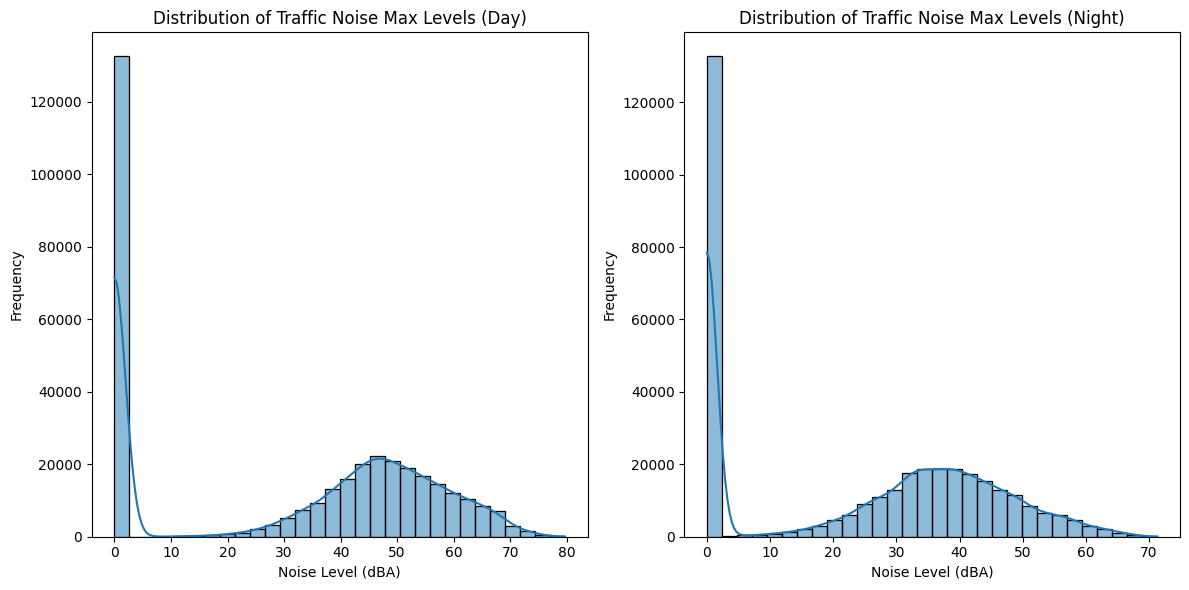

In [95]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_noise['window_noise_traffic_day_max'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Max Levels (Day)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_noise['window_noise_traffic_night_max'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Max Levels (Night)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

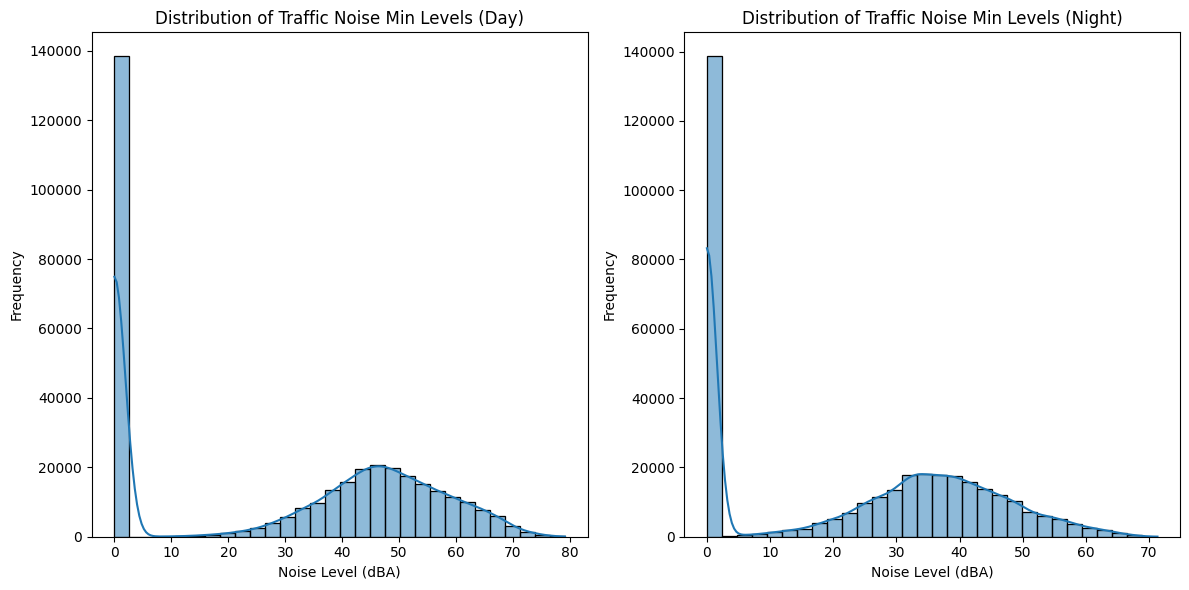

In [96]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_noise['window_noise_traffic_day_min'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Min Levels (Day)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_noise['window_noise_traffic_night_min'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Min Levels (Night)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

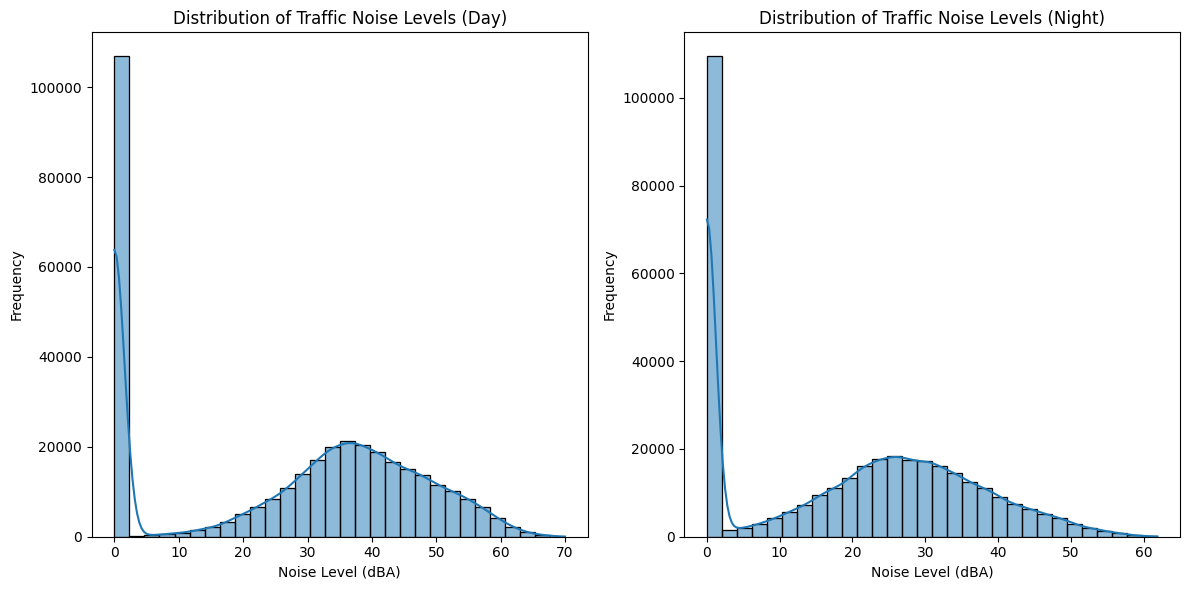

In [97]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_noise['noise_traffic_day'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Levels (Day)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_noise['noise_traffic_night'], bins=30, kde=True)
plt.title('Distribution of Traffic Noise Levels (Night)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

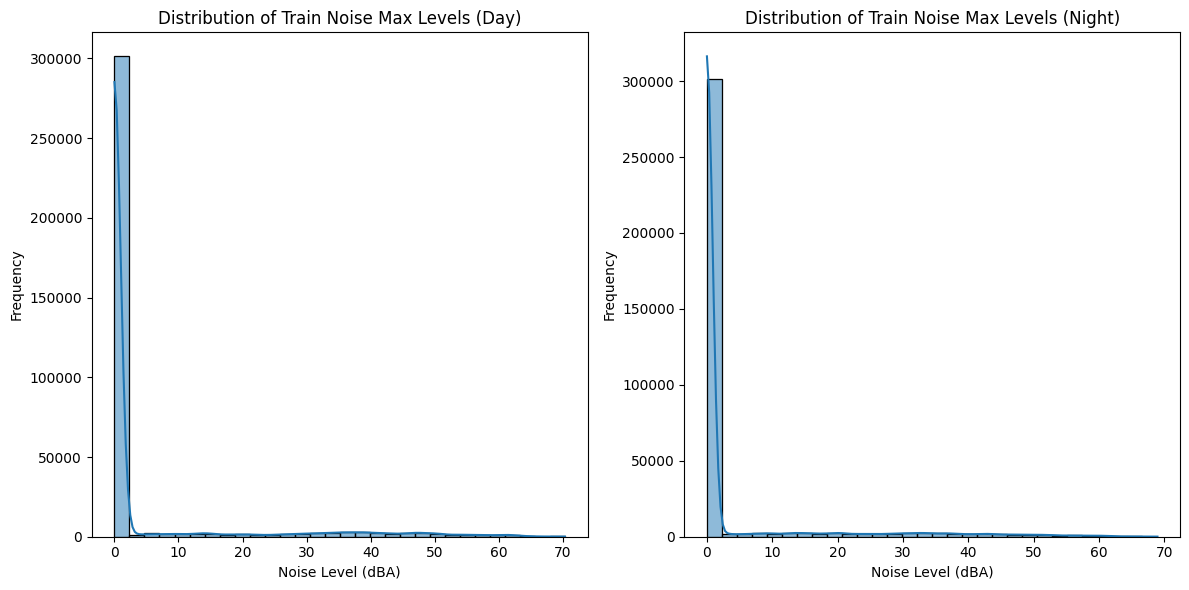

In [98]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_noise['window_noise_train_day_max'], bins=30, kde=True)
plt.title('Distribution of Train Noise Max Levels (Day)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_noise['window_noise_train_night_max'], bins=30, kde=True)
plt.title('Distribution of Train Noise Max Levels (Night)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

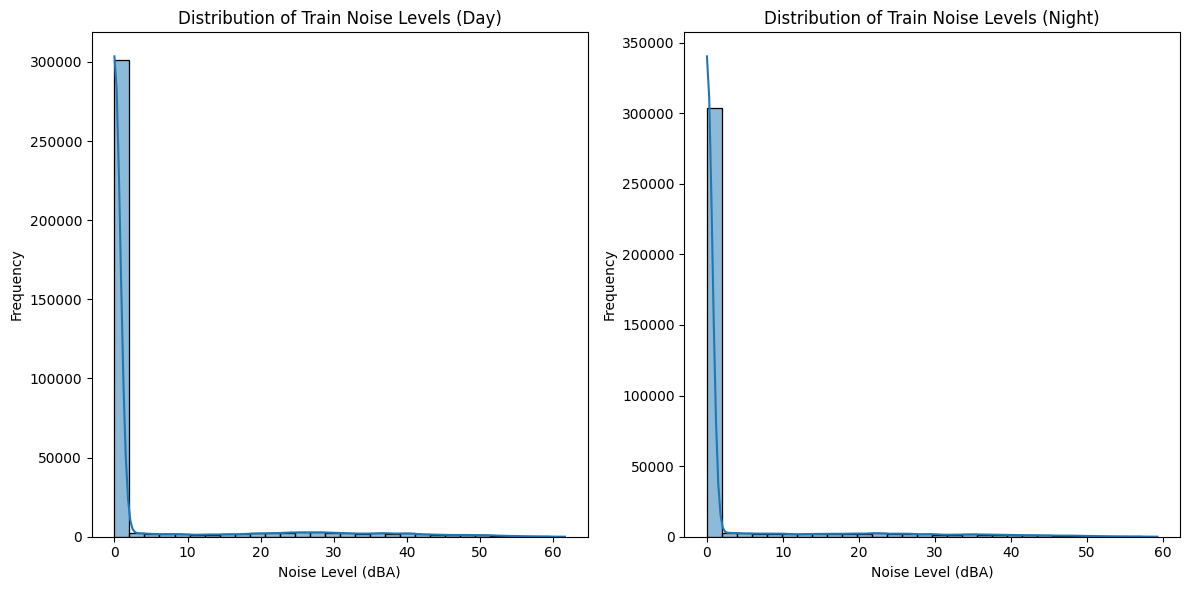

In [99]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_noise['noise_train_day'], bins=30, kde=True)
plt.title('Distribution of Train Noise Levels (Day)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_noise['noise_train_night'], bins=30, kde=True)
plt.title('Distribution of Train Noise Levels (Night)')
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In the previous chart, we can see the distribution of the columns related to noise. It follows a Tweedie distribution, with a peak at 0 and a long tail. We observe that most of the noise in the apartments is related to traffic.


#### View

In [100]:
df_view.head()

,apartment_id,area_id,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_isovist_mean,view_mountains_class_2_mean,view_mountains_class_3_mean,view_mountains_class_4_mean,view_mountains_class_5_mean,view_mountains_class_6_mean,view_pedestrians_mean,view_primary_streets_mean,view_railway_tracks_mean,view_secondary_streets_mean,view_site_mean,view_sky_mean,view_tertiary_streets_mean,view_water_mean,view_mountains_sum
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,0.047082,0.048150,0.052713,0.0,3.894352e+10,0.0,0.0,5.254534e-04,0.001762,0.001854,2.671420e-04,0.0,0.0,0.020627,0.539662,0.273395,0.004634,0.009327,0.004141
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.004579,0.000751,0.000558,0.0,8.685629e+08,0.0,0.0,9.975389e-07,0.000061,0.000096,9.676105e-07,0.0,0.0,0.000000,0.992472,0.000397,0.000542,0.000542,0.000158
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.029173,0.003917,0.006094,0.0,5.251659e+09,0.0,0.0,3.229953e-05,0.000318,0.000266,3.267835e-05,0.0,0.0,0.000710,0.949310,0.008995,0.000000,0.001152,0.000617
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.032052,0.000227,0.003430,0.0,6.227532e+08,0.0,0.0,1.357643e-06,0.000018,0.000018,4.897072e-06,0.0,0.0,0.000031,0.959225,0.003643,0.001285,0.000064,0.000037
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.009061,0.007105,0.005898,0.0,7.464645e+09,0.0,0.0,9.153263e-05,0.000270,0.000386,2.616552e-05,0.0,0.0,0.001363,0.960608,0.012720,0.000188,0.002283,0.000747


In [101]:
df_view.shape

(347583, 21)

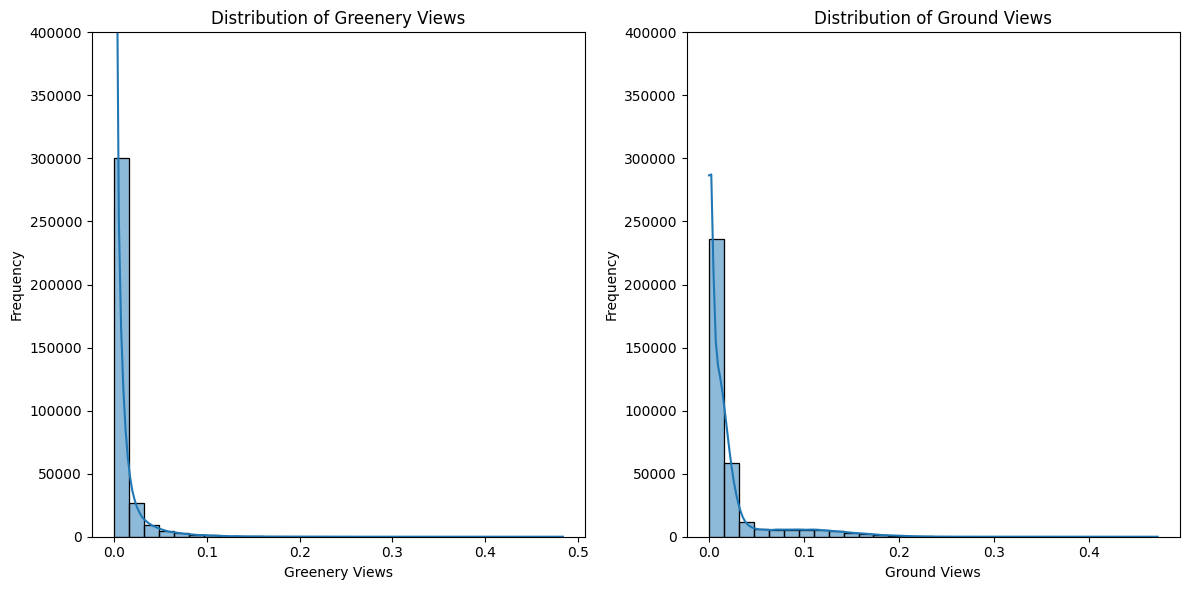

In [102]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_view['view_greenery_mean'], bins=30, kde=True)
plt.title('Distribution of Greenery Views')
plt.xlabel('Greenery Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)


plt.subplot(1, 2, 2)
sns.histplot(df_view['view_ground_mean'], bins=30, kde=True)
plt.title('Distribution of Ground Views')
plt.xlabel('Ground Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)


plt.tight_layout()
plt.show()

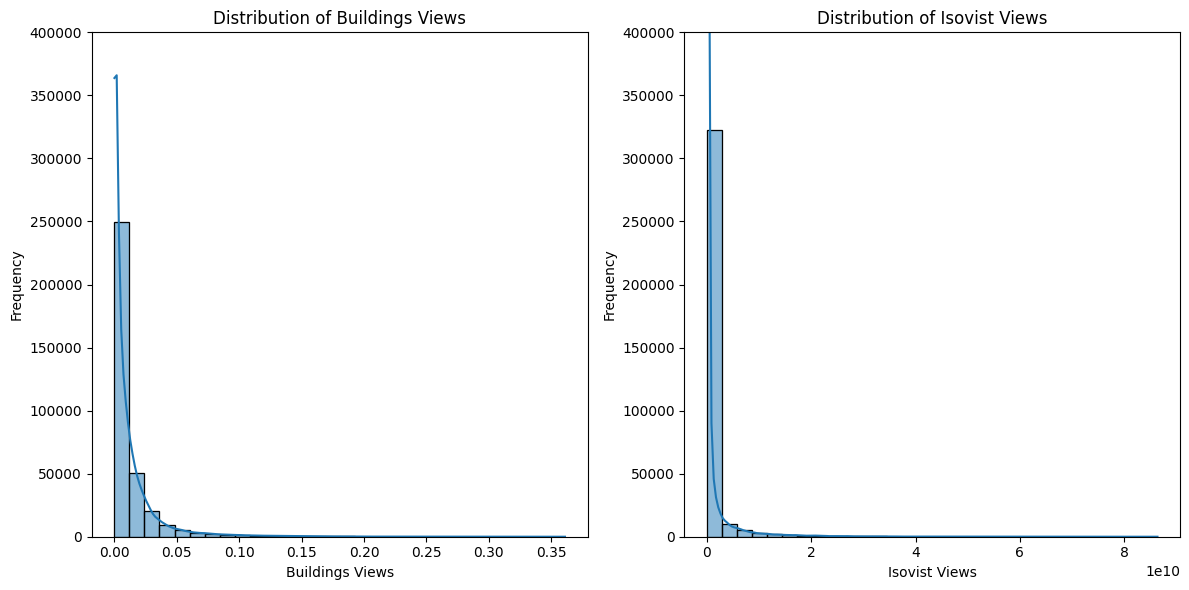

In [103]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_view['view_buildings_mean'], bins=30, kde=True)
plt.title('Distribution of Buildings Views')
plt.xlabel('Buildings Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)


plt.subplot(1, 2, 2)
sns.histplot(df_view['view_isovist_mean'], bins=30, kde=True)
plt.title('Distribution of Isovist Views')
plt.xlabel('Isovist Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)


plt.tight_layout()
plt.show()

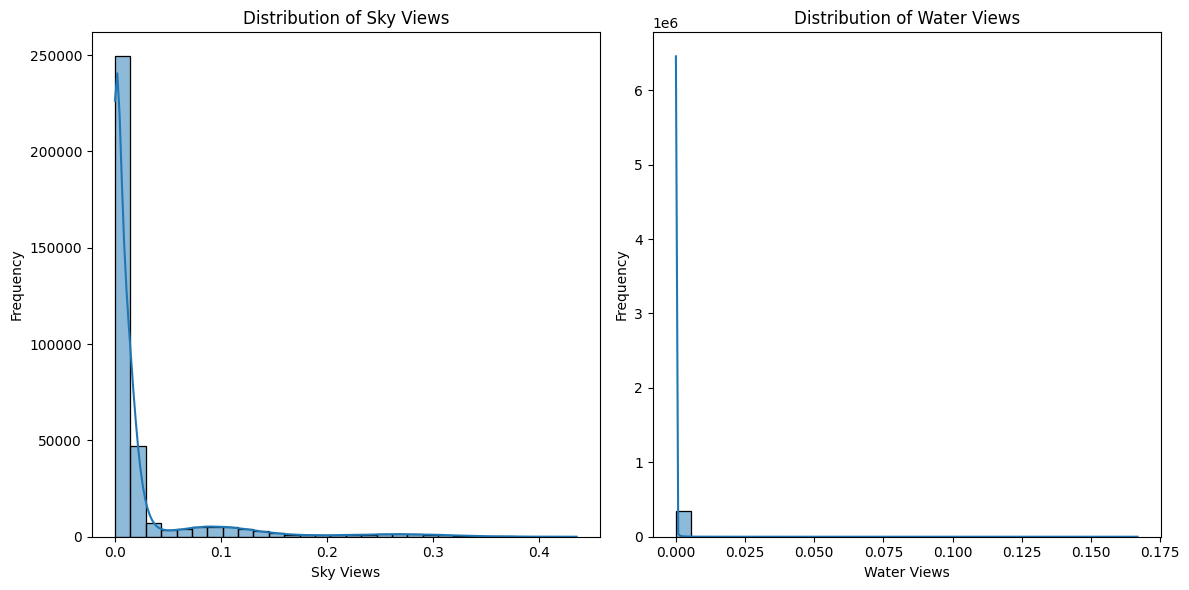

In [104]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_view['view_sky_mean'], bins=30, kde=True)
plt.title('Distribution of Sky Views')
plt.xlabel('Sky Views')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_view['view_water_mean'], bins=30, kde=True)
plt.title('Distribution of Water Views')
plt.xlabel('Water Views')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

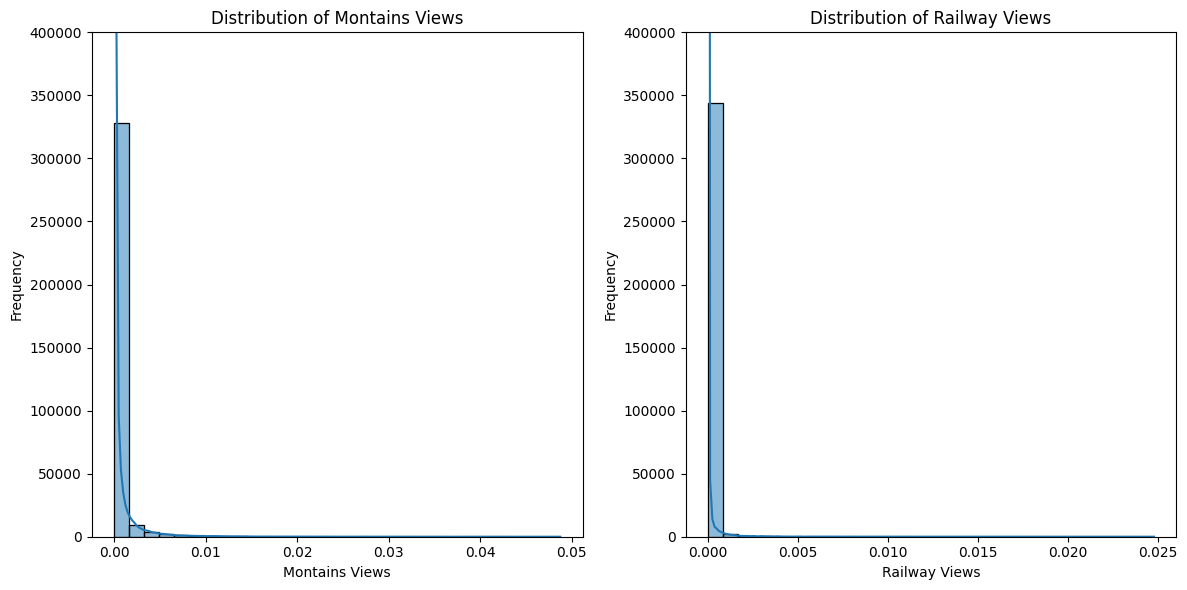

In [105]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_view['view_mountains_sum'], bins=30, kde=True)
plt.title('Distribution of Montains Views')
plt.xlabel('Montains Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)

plt.subplot(1, 2, 2)
sns.histplot(df_view['view_railway_tracks_mean'], bins=30, kde=True)
plt.title('Distribution of Railway Views')
plt.xlabel('Railway Views')
plt.ylabel('Frequency')
plt.ylim(0, 400000)


plt.tight_layout()
plt.show()

#### Sun

In [106]:
df_sun.head()

,apartment_id,area_id,sun_201803210800_mean,sun_201803211000_mean,sun_201803211200_mean,sun_201803211400_mean,sun_201803211600_mean,sun_201803211800_mean,sun_201806210600_mean,sun_201806210800_mean,sun_201806211000_mean,sun_201806211200_mean,sun_201806211400_mean,sun_201806211600_mean,sun_201806211800_mean,sun_201806212000_mean,sun_201812211000_mean,sun_201812211200_mean,sun_201812211400_mean,sun_201812211600_mean
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,8.085119,19.040440,24.053695,24.866790,21.839400,6.348764,1.289529,7.556745,13.939369,21.712163,24.452779,24.820588,18.767607,8.398003,8.804735,14.324611,13.524730,5.020043
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.129652,0.141662,0.109614,0.094139,0.091681,0.029800,0.025297,0.140332,0.124421,0.072191,0.053721,0.058857,0.059999,0.043485,0.129920,0.154482,0.106469,0.040855
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.388182,0.644725,0.745518,0.970325,1.340365,0.556007,0.081462,0.380459,0.456641,0.519760,0.720349,1.473587,2.133200,0.985698,0.553073,0.794230,0.711649,0.275420
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.302594,0.395321,0.383822,0.442644,0.539848,0.205977,0.108001,0.609018,0.522331,0.384491,0.374333,0.615784,0.795884,0.378343,0.206240,0.305138,0.299691,0.122054
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.954488,1.650147,1.699381,2.037315,2.149285,0.525012,0.117905,0.786016,1.181781,1.158191,1.271866,1.494312,1.086674,0.477317,0.976717,1.405507,1.379269,0.587787


In [107]:
df_sun.shape

(347583, 20)

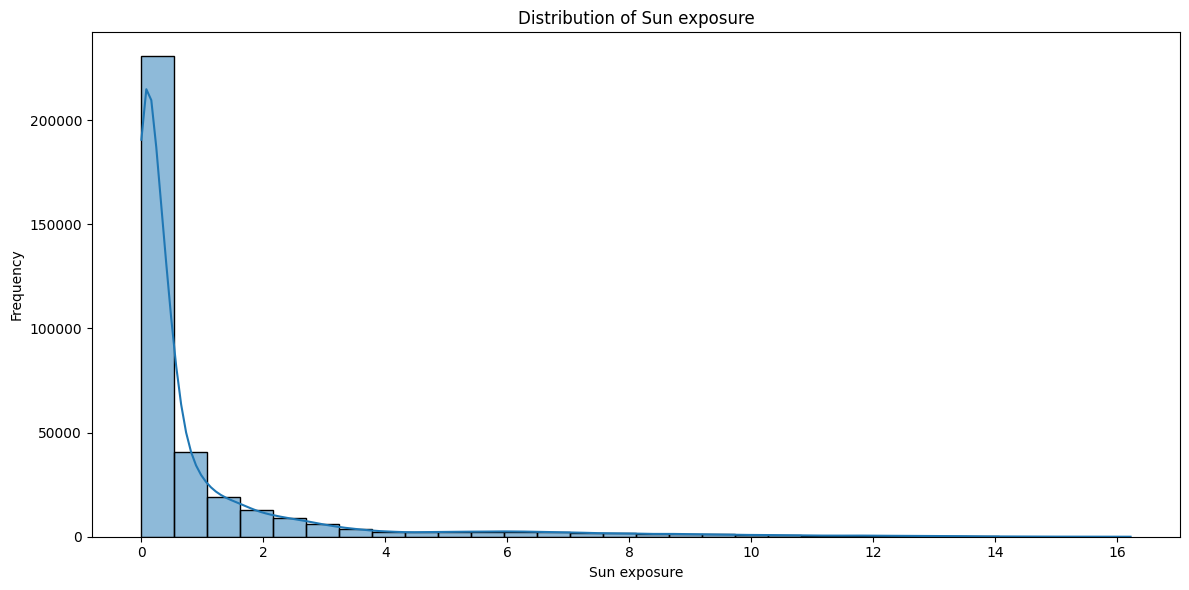

In [108]:
plt.figure(figsize=(12, 6))

sns.histplot(df_sun['sun_201803210800_mean'], bins=30, kde=True)
plt.title('Distribution of Sun exposure')
plt.xlabel('Sun exposure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

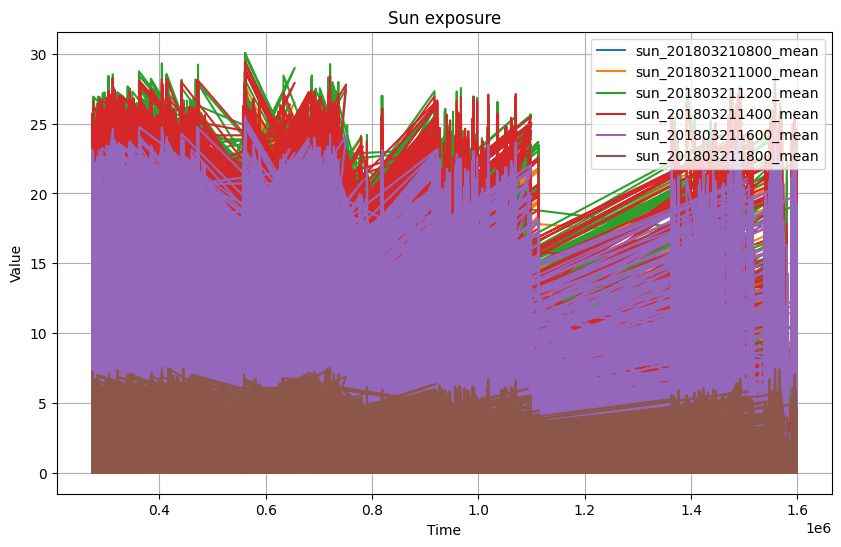

In [109]:
x = ['sun_201803', 'area_id']
df_sun_03 = df_sun[df_sun.columns[df_sun.columns.str.contains('|'.join(x))]]

plt.figure(figsize=(10, 6))

for column in df_sun_03.columns[1:]:
    plt.plot(df_sun_03['area_id'], df_sun_03[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sun exposure')
plt.legend()


plt.grid(True)
plt.show()

In [110]:
sun_exposure_months = {}
for column in df_sun.columns:
    if column.startswith('sun_'):
        date_info = column.split('_')[1]
        month = date_info[4:6]
        if month not in sun_exposure_months:
            sun_exposure_months[month] = []
        sun_exposure_months[month].append(df_sun[column].mean())


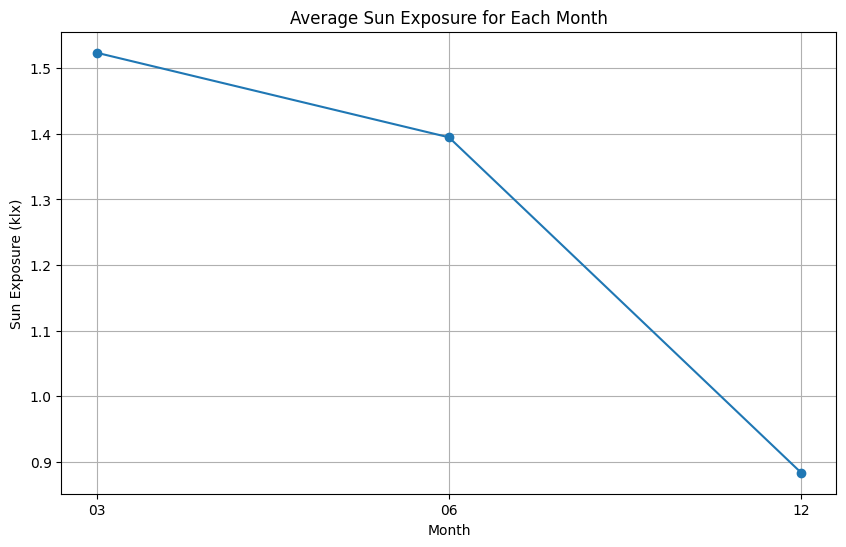

In [111]:
sun_exposure_months_mean = {month: sum(values)/len(values) for month, values in sun_exposure_months.items()}

sun_exposure_df = pd.DataFrame(list(sun_exposure_months_mean.items()), columns=['Month', 'Sun Exposure'])

sun_exposure_df['Month'] = pd.Categorical(sun_exposure_df['Month'], categories=[f'{i:02d}' for i in range(1, 13)], ordered=True)
sun_exposure_df = sun_exposure_df.sort_values('Month')

plt.figure(figsize=(10, 6))
plt.plot(sun_exposure_df['Month'], sun_exposure_df['Sun Exposure'], marker='o')
plt.title('Average Sun Exposure for Each Month')
plt.xlabel('Month')
plt.ylabel('Sun Exposure (klx)')
plt.grid(True)
plt.show()

In this chart we can see that march is the month with the highest average of sunlight, while december is the month with the lowest average of sunlight.

In [112]:
df_sun_06 = df_sun.drop('sun_201806210600_mean', axis=1)

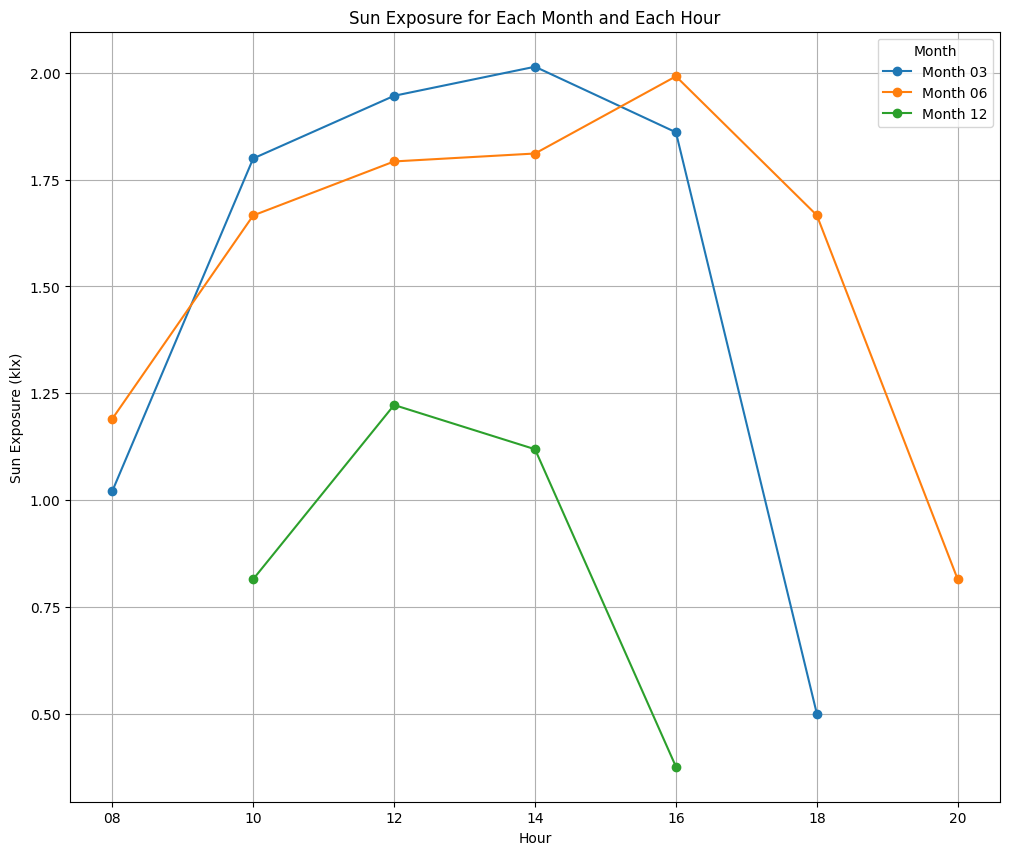

In [113]:
# extract the sun exposure columns
sun_columns = [col for col in df_sun_06.columns if col.startswith('sun_')]

# extract month and hour information 
sun_data = []
for column in sun_columns:
    date_info = column.split('_')[1]
    month = date_info[4:6]
    hour = date_info[8:10]
    mean_value = df_sun_06[column].mean()
    sun_data.append([month, hour, mean_value])

sun_df = pd.DataFrame(sun_data, columns=['Month', 'Hour', 'Sun Exposure'])

sun_df['Month'] = pd.Categorical(sun_df['Month'], categories=[f'{i:02d}' for i in range(1, 13)], ordered=True)
sun_df['Hour'] = pd.Categorical(sun_df['Hour'], categories=[f'{i:02d}' for i in range(0, 24, 2)], ordered=True)

plt.figure(figsize=(12, 10))

for month in sun_df['Month'].unique():
    monthly_data = sun_df[sun_df['Month'] == month]
    plt.plot(monthly_data['Hour'], monthly_data['Sun Exposure'], marker='o', label=f'Month {month}')

plt.title('Sun Exposure for Each Month and Each Hour')
plt.xlabel('Hour')
plt.ylabel('Sun Exposure (klx)')
plt.legend(title='Month')
plt.grid(True)
plt.show()


We can observe how sun exposure varies across different hours and months.

### Correlations

We have decided to use the Spearman method because our data did not exhibit a normal distribution, as shown in the plots above.



In [114]:
corr1 = df1_env_2.select_dtypes(include='number').corr(method='spearman')

In [115]:
corr1 = corr1.abs().unstack().sort_values(ascending=False).reset_index()
corr1.rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}, inplace=True)
corr1 = corr1[corr1['Variable 1'] != corr1['Variable 2']]
corr1.head(20)

,Variable 1,Variable 2,Correlation
122,view_mountains_class_2_max,view_mountains_class_2_mean,0.999994
123,view_mountains_class_2_mean,view_mountains_class_2_max,0.999994
124,view_highways_mean,view_highways_max,0.999969
125,view_highways_max,view_highways_mean,0.999969
126,sun_201803211800_min,sun_201806211800_min,0.999623
127,sun_201806211800_min,sun_201803211800_min,0.999623
128,view_secondary_streets_max,view_secondary_streets_mean,0.999623
129,view_secondary_streets_mean,view_secondary_streets_max,0.999623
130,sun_201803210800_min,sun_201806211000_min,0.999598
131,sun_201806211000_min,sun_201803210800_min,0.999598


In [116]:
df_corr = df_sun.merge(df_view, on=['area_id', 'apartment_id'], how='inner')
df_corr = df_corr.merge(df_noise, on=['area_id', 'apartment_id'], how='inner')

df_corr = df_corr.drop(columns=['view_mountains_class_2_mean', 'view_mountains_class_3_mean', 'view_mountains_class_4_mean', 'view_mountains_class_5_mean', 'view_mountains_class_6_mean'])
corr2 = df_corr.select_dtypes(include='number').corr(method='spearman')

In [117]:
corr2 = corr2.abs().unstack().sort_values(ascending=False).reset_index()
corr2.rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}, inplace=True)
corr2 = corr2[corr2['Variable 1'] != corr2['Variable 2']]
corr2.head(20)

,Variable 1,Variable 2,Correlation
45,window_noise_train_day_max,window_noise_train_night_max,0.997560
46,window_noise_train_night_max,window_noise_train_day_max,0.997560
47,window_noise_train_day_min,window_noise_train_night_min,0.997404
48,window_noise_train_night_min,window_noise_train_day_min,0.997404
49,sun_201803211400_mean,sun_201812211400_mean,0.991598
50,sun_201812211400_mean,sun_201803211400_mean,0.991598
51,sun_201803211200_mean,sun_201812211200_mean,0.991188
52,sun_201812211200_mean,sun_201803211200_mean,0.991188
53,sun_201803211000_mean,sun_201806211200_mean,0.991144
54,sun_201806211200_mean,sun_201803211000_mean,0.991144


We are going to proceed to do feature engineering as the correlation now has no much sense with all these correlated variables.

## Feature engineering

### Noise

In [118]:
df_noise.head()

,apartment_id,area_id,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night,window_noise_traffic_day_max,window_noise_traffic_day_min,window_noise_traffic_night_max,window_noise_traffic_night_min,window_noise_train_day_max,window_noise_train_day_min,window_noise_train_night_max,window_noise_train_night_min
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,52.760765,34.910963,0.0,0.0,63.323205,62.937971,45.424094,45.137298,0.0,0.0,0.0,0.0
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,51.176142,33.285072,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,51.176142,33.285072,0.0,0.0,59.581147,59.581147,42.156912,42.156912,0.0,0.0,0.0,0.0
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,46.268390,28.457845,0.0,0.0,58.855539,52.733549,41.409454,32.995381,0.0,0.0,0.0,0.0
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,51.176142,33.285072,0.0,0.0,63.323205,61.594464,45.424094,43.186812,0.0,0.0,0.0,0.0


In [119]:
df_noise.columns

Index(['apartment_id', 'area_id', 'noise_traffic_day', 'noise_traffic_night',
       'noise_train_day', 'noise_train_night', 'window_noise_traffic_day_max',
       'window_noise_traffic_day_min', 'window_noise_traffic_night_max',
       'window_noise_traffic_night_min', 'window_noise_train_day_max',
       'window_noise_train_day_min', 'window_noise_train_night_max',
       'window_noise_train_night_min'],
      dtype='object')

In [120]:
df_noise_reduced = df_noise[['apartment_id', 'area_id']]

We are going to create new columns that represent the mean values of the noise columns.

In [121]:
df_noise_reduced['window_noise_traffic_day'] = (df_noise['window_noise_traffic_day_max'] + df_noise['window_noise_traffic_day_min']) / 2
df_noise_reduced['window_noise_traffic_night'] = (df_noise['window_noise_traffic_night_max'] + df_noise['window_noise_traffic_night_min']) / 2

df_noise_reduced['window_noise_train_day'] = (df_noise['window_noise_train_day_max'] + df_noise['window_noise_train_day_min']) / 2
df_noise_reduced['window_noise_train_night'] = (df_noise['window_noise_train_night_max'] + df_noise['window_noise_train_night_min']) / 2

In [122]:
df_noise_reduced.head()

,apartment_id,area_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,63.130588,45.280696,0.0,0.0
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.000000,0.000000,0.0,0.0
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,59.581147,42.156912,0.0,0.0
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,55.794544,37.202417,0.0,0.0
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,62.458835,44.305453,0.0,0.0


### View

In [123]:
df_view.head()

,apartment_id,area_id,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_isovist_mean,view_mountains_class_2_mean,view_mountains_class_3_mean,view_mountains_class_4_mean,view_mountains_class_5_mean,view_mountains_class_6_mean,view_pedestrians_mean,view_primary_streets_mean,view_railway_tracks_mean,view_secondary_streets_mean,view_site_mean,view_sky_mean,view_tertiary_streets_mean,view_water_mean,view_mountains_sum
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,0.047082,0.048150,0.052713,0.0,3.894352e+10,0.0,0.0,5.254534e-04,0.001762,0.001854,2.671420e-04,0.0,0.0,0.020627,0.539662,0.273395,0.004634,0.009327,0.004141
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.004579,0.000751,0.000558,0.0,8.685629e+08,0.0,0.0,9.975389e-07,0.000061,0.000096,9.676105e-07,0.0,0.0,0.000000,0.992472,0.000397,0.000542,0.000542,0.000158
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.029173,0.003917,0.006094,0.0,5.251659e+09,0.0,0.0,3.229953e-05,0.000318,0.000266,3.267835e-05,0.0,0.0,0.000710,0.949310,0.008995,0.000000,0.001152,0.000617
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.032052,0.000227,0.003430,0.0,6.227532e+08,0.0,0.0,1.357643e-06,0.000018,0.000018,4.897072e-06,0.0,0.0,0.000031,0.959225,0.003643,0.001285,0.000064,0.000037
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.009061,0.007105,0.005898,0.0,7.464645e+09,0.0,0.0,9.153263e-05,0.000270,0.000386,2.616552e-05,0.0,0.0,0.001363,0.960608,0.012720,0.000188,0.002283,0.000747


In [124]:
df_view.columns

Index(['apartment_id', 'area_id', 'view_buildings_mean', 'view_greenery_mean',
       'view_ground_mean', 'view_highways_mean', 'view_isovist_mean',
       'view_mountains_class_2_mean', 'view_mountains_class_3_mean',
       'view_mountains_class_4_mean', 'view_mountains_class_5_mean',
       'view_mountains_class_6_mean', 'view_pedestrians_mean',
       'view_primary_streets_mean', 'view_railway_tracks_mean',
       'view_secondary_streets_mean', 'view_site_mean', 'view_sky_mean',
       'view_tertiary_streets_mean', 'view_water_mean', 'view_mountains_sum'],
      dtype='object')

Selecting the columns to work with.

In [125]:
df_view_reduced = df_view[['apartment_id', 'area_id','view_buildings_mean', 'view_greenery_mean',
       'view_ground_mean', 'view_highways_mean','view_pedestrians_mean',
       'view_primary_streets_mean', 'view_railway_tracks_mean',
       'view_secondary_streets_mean', 'view_sky_mean',
       'view_tertiary_streets_mean', 'view_water_mean', 'view_mountains_sum']]

In [126]:
df_view_reduced.columns


Index(['apartment_id', 'area_id', 'view_buildings_mean', 'view_greenery_mean',
       'view_ground_mean', 'view_highways_mean', 'view_pedestrians_mean',
       'view_primary_streets_mean', 'view_railway_tracks_mean',
       'view_secondary_streets_mean', 'view_sky_mean',
       'view_tertiary_streets_mean', 'view_water_mean', 'view_mountains_sum'],
      dtype='object')

We are going to create a new column that represents the sum of all columns related to street views.

In [127]:
df_view_reduced['view_street_sum'] = df_view_reduced['view_primary_streets_mean'] + df_view_reduced['view_secondary_streets_mean'] + df_view_reduced['view_tertiary_streets_mean']

df_view_reduced = df_view_reduced.drop(columns=['view_primary_streets_mean', 'view_secondary_streets_mean', 'view_tertiary_streets_mean'])

In [128]:
df_view_reduced['view_natural_sum'] = df_view_reduced['view_greenery_mean'] + df_view_reduced['view_ground_mean'] + df_view_reduced['view_sky_mean'] + df_view_reduced['view_water_mean'] + df_view_reduced['view_mountains_sum']

df_view_reduced['view_urban_sum'] = df_view_reduced['view_highways_mean'] + df_view_reduced['view_pedestrians_mean'] + df_view_reduced['view_railway_tracks_mean'] + df_view_reduced['view_buildings_mean']+ df_view_reduced['view_street_sum']

In [129]:
df_view_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
area_id,347583.0,659117.126994,362919.933040,273642.00000,3.904155e+05,478887.000000,7.909615e+05,1.598638e+06
view_buildings_mean,347383.0,0.011912,0.021634,0.00000,6.551479e-04,0.004322,1.382354e-02,3.610128e-01
view_greenery_mean,347383.0,0.008310,0.017190,0.00000,2.604842e-04,0.002456,8.602293e-03,4.840653e-01
view_ground_mean,347383.0,0.020855,0.036520,0.00000,7.505058e-04,0.007959,1.990594e-02,4.721198e-01
view_highways_mean,347383.0,0.000009,0.000232,0.00000,0.000000e+00,0.000000,0.000000e+00,2.505816e-02
view_pedestrians_mean,347383.0,0.000509,0.002182,0.00000,0.000000e+00,0.000007,1.750789e-04,9.585329e-02
view_railway_tracks_mean,347383.0,0.000041,0.000468,0.00000,0.000000e+00,0.000000,0.000000e+00,2.479244e-02
view_sky_mean,347383.0,0.024085,0.053655,0.00003,3.199034e-04,0.006082,1.636802e-02,4.349598e-01
view_water_mean,347383.0,0.000124,0.001436,0.00000,0.000000e+00,0.000000,1.698994e-07,1.668116e-01
view_mountains_sum,347383.0,0.000371,0.001597,0.00000,0.000000e+00,0.000001,1.104520e-04,4.873802e-02


In [130]:
df_view_reduced['view_natural_ratio'] = df_view_reduced['view_natural_sum'] / (df_view_reduced['view_natural_sum'] + df_view_reduced['view_urban_sum'])
df_view_reduced['view_urban_ratio'] = df_view_reduced['view_urban_sum'] / (df_view_reduced['view_natural_sum'] + df_view_reduced['view_urban_sum'])

In [131]:
df_view_reduced.head()

,apartment_id,area_id,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,view_natural_sum,view_urban_sum,view_natural_ratio,view_urban_ratio
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,0.047082,0.048150,0.052713,0.0,2.671420e-04,0.0,0.273395,0.009327,0.004141,0.025261,0.387728,0.072611,0.842267,0.157733
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.004579,0.000751,0.000558,0.0,9.676105e-07,0.0,0.000397,0.000542,0.000158,0.000542,0.002406,0.005122,0.319602,0.680398
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.029173,0.003917,0.006094,0.0,3.267835e-05,0.0,0.008995,0.001152,0.000617,0.000710,0.020775,0.029915,0.409836,0.590164
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.032052,0.000227,0.003430,0.0,4.897072e-06,0.0,0.003643,0.000064,0.000037,0.001316,0.007402,0.033373,0.181537,0.818463
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.009061,0.007105,0.005898,0.0,2.616552e-05,0.0,0.012720,0.002283,0.000747,0.001552,0.028753,0.010639,0.729924,0.270076


### Sun

In [132]:
df_sun.head()

,apartment_id,area_id,sun_201803210800_mean,sun_201803211000_mean,sun_201803211200_mean,sun_201803211400_mean,sun_201803211600_mean,sun_201803211800_mean,sun_201806210600_mean,sun_201806210800_mean,sun_201806211000_mean,sun_201806211200_mean,sun_201806211400_mean,sun_201806211600_mean,sun_201806211800_mean,sun_201806212000_mean,sun_201812211000_mean,sun_201812211200_mean,sun_201812211400_mean,sun_201812211600_mean
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,8.085119,19.040440,24.053695,24.866790,21.839400,6.348764,1.289529,7.556745,13.939369,21.712163,24.452779,24.820588,18.767607,8.398003,8.804735,14.324611,13.524730,5.020043
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.129652,0.141662,0.109614,0.094139,0.091681,0.029800,0.025297,0.140332,0.124421,0.072191,0.053721,0.058857,0.059999,0.043485,0.129920,0.154482,0.106469,0.040855
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.388182,0.644725,0.745518,0.970325,1.340365,0.556007,0.081462,0.380459,0.456641,0.519760,0.720349,1.473587,2.133200,0.985698,0.553073,0.794230,0.711649,0.275420
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.302594,0.395321,0.383822,0.442644,0.539848,0.205977,0.108001,0.609018,0.522331,0.384491,0.374333,0.615784,0.795884,0.378343,0.206240,0.305138,0.299691,0.122054
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,0.954488,1.650147,1.699381,2.037315,2.149285,0.525012,0.117905,0.786016,1.181781,1.158191,1.271866,1.494312,1.086674,0.477317,0.976717,1.405507,1.379269,0.587787


In [133]:
df_sun.columns

Index(['apartment_id', 'area_id', 'sun_201803210800_mean',
       'sun_201803211000_mean', 'sun_201803211200_mean',
       'sun_201803211400_mean', 'sun_201803211600_mean',
       'sun_201803211800_mean', 'sun_201806210600_mean',
       'sun_201806210800_mean', 'sun_201806211000_mean',
       'sun_201806211200_mean', 'sun_201806211400_mean',
       'sun_201806211600_mean', 'sun_201806211800_mean',
       'sun_201806212000_mean', 'sun_201812211000_mean',
       'sun_201812211200_mean', 'sun_201812211400_mean',
       'sun_201812211600_mean'],
      dtype='object')

In [134]:
df_sun_reduced = df_sun[['apartment_id', 'area_id']]

We are going to group the columns by month and hour and calculate the mean value of the columns.

In [135]:
df_sun_reduced['morning_mar'] = (df_sun['sun_201803210800_mean'] + df_sun['sun_201803211000_mean']) / 2
df_sun_reduced['noon_mar'] = (df_sun['sun_201803211200_mean'] + df_sun['sun_201803211400_mean']) / 2
df_sun_reduced['evening_mar'] = (df_sun['sun_201803211600_mean'] + df_sun['sun_201803211800_mean']) / 2

df_sun_reduced['morning_jun'] = (df_sun['sun_201806210600_mean'] + df_sun['sun_201806210800_mean'] + df_sun['sun_201806211000_mean']) / 3
df_sun_reduced['noon_jun'] = (df_sun['sun_201806211200_mean'] + df_sun['sun_201806211400_mean']) / 2
df_sun_reduced['evening_jun'] = (df_sun['sun_201806211600_mean'] + df_sun['sun_201806211800_mean']) / 2

df_sun_reduced['morning_dec'] = df_sun['sun_201812211000_mean']
df_sun_reduced['noon_dec'] = (df_sun['sun_201812211200_mean'] + df_sun['sun_201812211400_mean']) / 2
df_sun_reduced['evening_dec'] = df_sun['sun_201812211600_mean']

In [136]:
df_sun_reduced['mean_mar'] = (df_sun_reduced['morning_mar'] + df_sun_reduced['noon_mar'] + df_sun_reduced['evening_mar']) / 3
df_sun_reduced['mean_jun'] = (df_sun_reduced['morning_jun'] + df_sun_reduced['noon_jun'] + df_sun_reduced['evening_jun']) / 3
df_sun_reduced['mean_dec'] = (df_sun_reduced['morning_dec'] + df_sun_reduced['noon_dec'] + df_sun_reduced['evening_dec']) / 3

In [137]:
df_sun_reduced['mean_morning'] = (df_sun_reduced['morning_mar'] + df_sun_reduced['morning_jun'] + df_sun_reduced['morning_dec']) / 3
df_sun_reduced['mean_noon'] = (df_sun_reduced['noon_mar'] + df_sun_reduced['noon_jun'] + df_sun_reduced['noon_dec']) / 3
df_sun_reduced['mean_evening'] = (df_sun_reduced['evening_mar'] + df_sun_reduced['evening_jun'] + df_sun_reduced['evening_dec']) / 3

In [138]:
df_sun_reduced.head()

,apartment_id,area_id,morning_mar,noon_mar,evening_mar,morning_jun,noon_jun,evening_jun,morning_dec,noon_dec,evening_dec,mean_mar,mean_jun,mean_dec,mean_morning,mean_noon,mean_evening
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,13.562779,24.460243,14.094082,7.595215,23.082471,21.794098,8.804735,13.924671,5.020043,17.372368,17.490594,9.249816,9.987576,20.489128,13.636074
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.135657,0.101877,0.060741,0.096684,0.062956,0.059428,0.129920,0.130475,0.040855,0.099425,0.073022,0.100417,0.120753,0.098436,0.053675
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,0.516454,0.857922,0.948186,0.306187,0.620055,1.803394,0.553073,0.752940,0.275420,0.774187,0.909878,0.527144,0.458571,0.743639,1.009000
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,0.348957,0.413233,0.372912,0.413117,0.379412,0.705834,0.206240,0.302414,0.122054,0.378367,0.499454,0.210236,0.322771,0.365020,0.400267
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,1.302317,1.868348,1.337148,0.695234,1.215029,1.290493,0.976717,1.392388,0.587787,1.502605,1.066919,0.985631,0.991423,1.491922,1.071810


### Creating the full dataframe

In [139]:
df_features = df_noise_reduced.merge(df_view_reduced, on=['area_id', 'apartment_id'], how='inner')
df_features = df_features.merge(df_sun_reduced, on=['area_id', 'apartment_id'], how='inner')

In [140]:
df_features.head()

,apartment_id,area_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,view_natural_sum,view_urban_sum,view_natural_ratio,view_urban_ratio,morning_mar,noon_mar,evening_mar,morning_jun,noon_jun,evening_jun,morning_dec,noon_dec,evening_dec,mean_mar,mean_jun,mean_dec,mean_morning,mean_noon,mean_evening
0,8e1b4bfedca9a0db1611cbdd602f47c9,273711,63.130588,45.280696,0.0,0.0,0.047082,0.048150,0.052713,0.0,2.671420e-04,0.0,0.273395,0.009327,0.004141,0.025261,0.387728,0.072611,0.842267,0.157733,13.562779,24.460243,14.094082,7.595215,23.082471,21.794098,8.804735,13.924671,5.020043,17.372368,17.490594,9.249816,9.987576,20.489128,13.636074
1,8e1b4bfedca9a0db1611cbdd602f47c9,273714,0.000000,0.000000,0.0,0.0,0.004579,0.000751,0.000558,0.0,9.676105e-07,0.0,0.000397,0.000542,0.000158,0.000542,0.002406,0.005122,0.319602,0.680398,0.135657,0.101877,0.060741,0.096684,0.062956,0.059428,0.129920,0.130475,0.040855,0.099425,0.073022,0.100417,0.120753,0.098436,0.053675
2,8e1b4bfedca9a0db1611cbdd602f47c9,273717,59.581147,42.156912,0.0,0.0,0.029173,0.003917,0.006094,0.0,3.267835e-05,0.0,0.008995,0.001152,0.000617,0.000710,0.020775,0.029915,0.409836,0.590164,0.516454,0.857922,0.948186,0.306187,0.620055,1.803394,0.553073,0.752940,0.275420,0.774187,0.909878,0.527144,0.458571,0.743639,1.009000
3,8e1b4bfedca9a0db1611cbdd602f47c9,273715,55.794544,37.202417,0.0,0.0,0.032052,0.000227,0.003430,0.0,4.897072e-06,0.0,0.003643,0.000064,0.000037,0.001316,0.007402,0.033373,0.181537,0.818463,0.348957,0.413233,0.372912,0.413117,0.379412,0.705834,0.206240,0.302414,0.122054,0.378367,0.499454,0.210236,0.322771,0.365020,0.400267
4,8e1b4bfedca9a0db1611cbdd602f47c9,273720,62.458835,44.305453,0.0,0.0,0.009061,0.007105,0.005898,0.0,2.616552e-05,0.0,0.012720,0.002283,0.000747,0.001552,0.028753,0.010639,0.729924,0.270076,1.302317,1.868348,1.337148,0.695234,1.215029,1.290493,0.976717,1.392388,0.587787,1.502605,1.066919,0.985631,0.991423,1.491922,1.071810


In [141]:
df_features.shape

(347613, 35)

In [142]:
df_features.isna().sum()[df_features.isna().sum()>0]

view_buildings_mean         200
view_greenery_mean          200
view_ground_mean            200
view_highways_mean          200
view_pedestrians_mean       200
view_railway_tracks_mean    200
view_sky_mean               200
view_water_mean             200
view_mountains_sum          200
view_street_sum             200
view_natural_sum            200
view_urban_sum              200
view_natural_ratio          200
view_urban_ratio            200
morning_mar                 200
noon_mar                    200
evening_mar                 200
morning_jun                 200
noon_jun                    200
evening_jun                 200
morning_dec                 200
noon_dec                    200
evening_dec                 200
mean_mar                    200
mean_jun                    200
mean_dec                    200
mean_morning                200
mean_noon                   200
mean_evening                200
dtype: int64

In [143]:
df_features[df_features.isna().any(axis=1)]

,apartment_id,area_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,view_natural_sum,view_urban_sum,view_natural_ratio,view_urban_ratio,morning_mar,noon_mar,evening_mar,morning_jun,noon_jun,evening_jun,morning_dec,noon_dec,evening_dec,mean_mar,mean_jun,mean_dec,mean_morning,mean_noon,mean_evening
5143,29ab7404f0e0d0697141283049f6e5de,421175,43.737568,32.483525,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6056,186378e9c25bc0a5e37cff39c6803fbd,1362818,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6066,628e5a9f39b074f00bfb24350919d2af,1362818,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6187,d59bfdd07ab71791fa231740a95c9546,1362818,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208,2801978d2e67d95bde26d1cb19c46362,1362818,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301953,34291d0fa37aaf43d0e1d005cb4ac79e,286245,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301970,0011ceb2732050f510ff1c2a28f91fb9,286171,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302025,617d04bff67653f40014b5fe257a1d02,396615,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302039,73fcfb25b5360f673c1d98931fca66d1,285676,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will remove rows with null values as they are consistently in the same rows and represent a very low percentage of the total data.

### Cleaning the data

In [144]:
df_features = df_features.dropna()

In [145]:
df_features.isna().sum()[df_features.isna().sum()>0]

Series([], dtype: int64)

We are going to group the columns by apartment_id and calculate the mean value of the columns.

In [146]:
df_features = df_features.groupby(['apartment_id']).mean().reset_index()

In [147]:
df_features = df_features.drop(columns=['area_id'])

## Data analysis after treatment

### Visualizations

In [148]:
df_features.head()

,apartment_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,view_natural_sum,view_urban_sum,view_natural_ratio,view_urban_ratio,morning_mar,noon_mar,evening_mar,morning_jun,noon_jun,evening_jun,morning_dec,noon_dec,evening_dec,mean_mar,mean_jun,mean_dec,mean_morning,mean_noon,mean_evening
0,00024dcb907dc1671ef48af550271427,26.050232,17.786085,0.0,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.016660,0.000000,0.000000,5.309107e-04,0.064934,0.013940,0.716494,0.283506,1.213924,1.351526,0.896759,1.135133,1.292409,1.526104,0.607588,0.837305,0.265230,1.154070,1.317882,0.570041,0.985548,1.160413,0.896031
1,00048208e97e07b7b183718826929def,25.465895,17.790932,0.0,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.017772,0.000493,0.000071,1.419091e-03,0.034746,0.003847,0.839762,0.160238,1.000308,1.105115,1.197088,0.804514,0.909190,1.677251,0.506564,0.713128,0.315683,1.100837,1.130318,0.511792,0.770462,0.909144,1.063340
2,00048321bf465caba119f73d57093299,33.533112,28.146663,0.0,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.034343,0.000000,0.000506,8.415804e-03,0.058543,0.022389,0.782013,0.217987,1.094409,3.221745,2.800813,0.607570,2.007235,3.518316,1.040895,2.063384,0.977945,2.372322,2.044373,1.360741,0.914291,2.430788,2.432358
3,00075003b82a8cf375c274560aa6bc9c,27.666442,19.688055,0.0,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.019612,0.000000,0.000000,1.808636e-04,0.045470,0.006602,0.780343,0.219657,0.805975,1.462474,1.302101,0.701368,1.094519,2.104608,0.599384,1.001575,0.414049,1.190183,1.300165,0.671669,0.702243,1.186189,1.273586
4,000916099693de3f997973f552fdff07,21.522038,15.213498,0.0,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.008013,0.000000,0.000000,9.432771e-07,0.050300,0.000920,0.974020,0.025980,1.005287,0.991395,0.289898,0.843773,1.072992,0.411827,0.490027,0.589559,0.121464,0.762193,0.776197,0.400350,0.779696,0.884649,0.274397


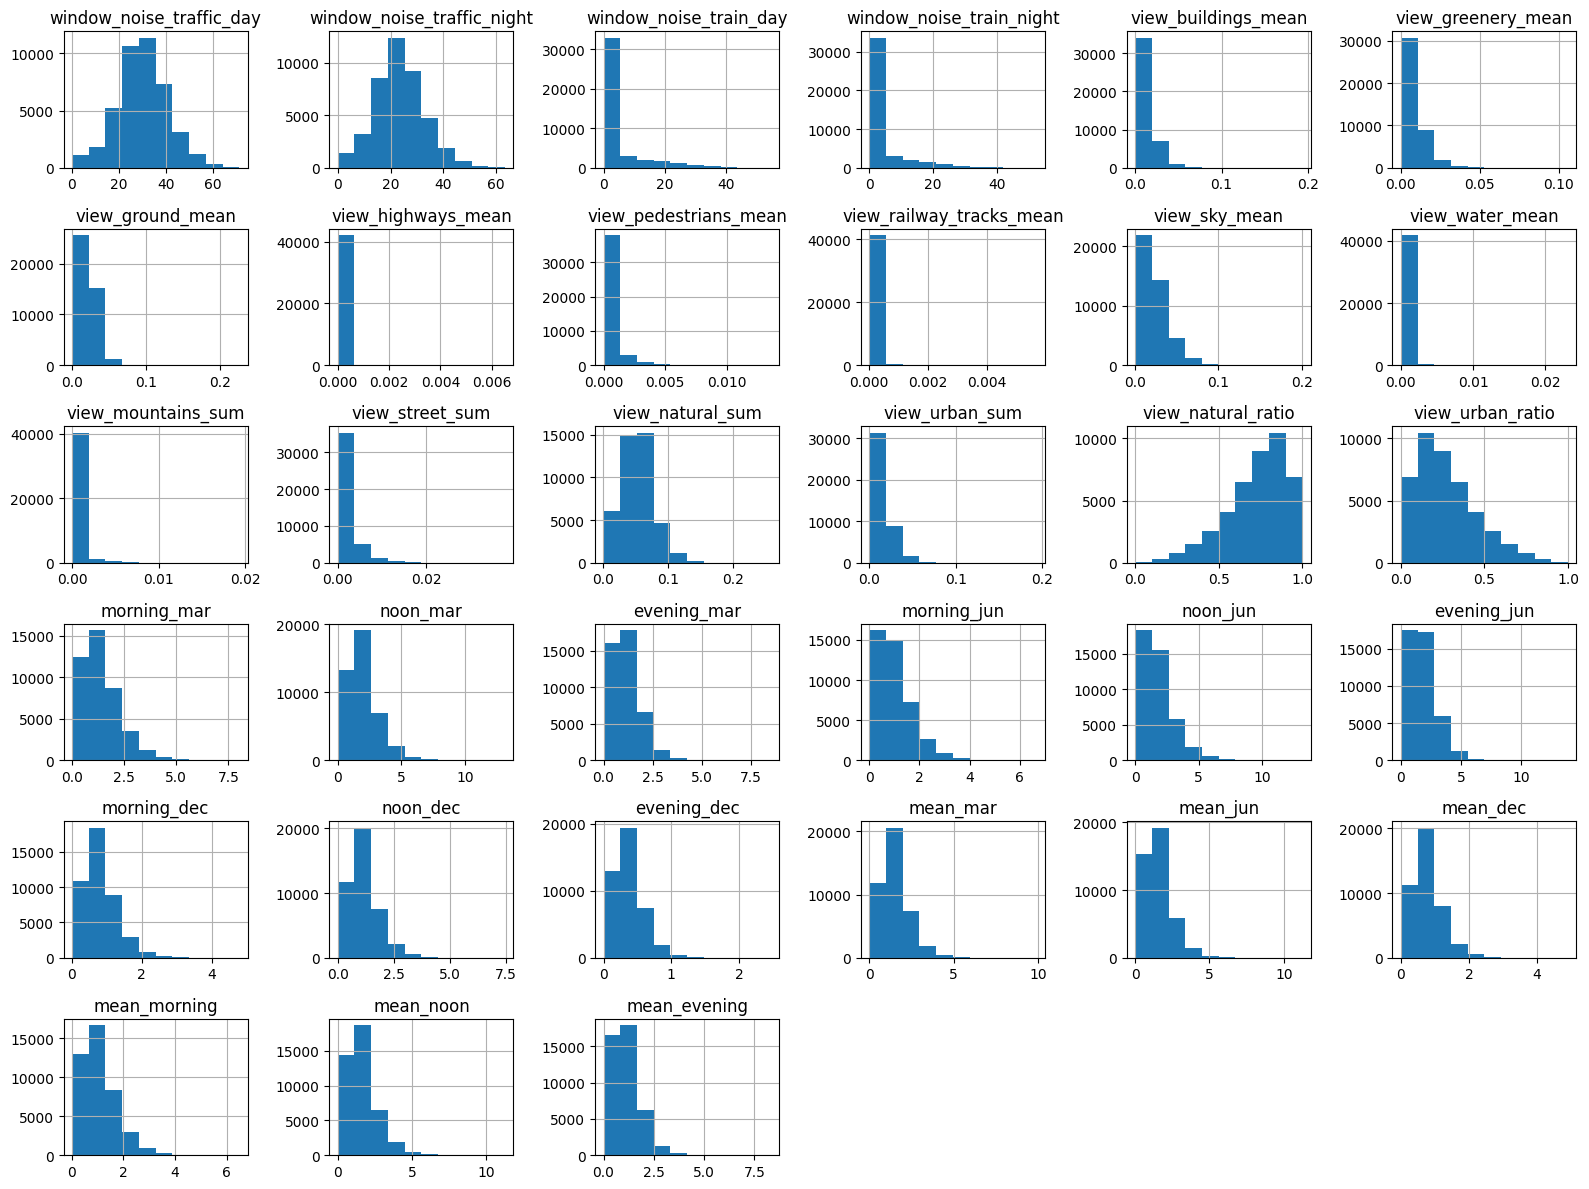

In [149]:
df_features.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()


### Correlations

In [150]:
corr_features = df_features.select_dtypes(include='number').corr(method='spearman')

In [151]:
mask = np.triu(np.ones_like(corr_features, dtype=bool))
corr_features_masked = corr_features.mask(mask)

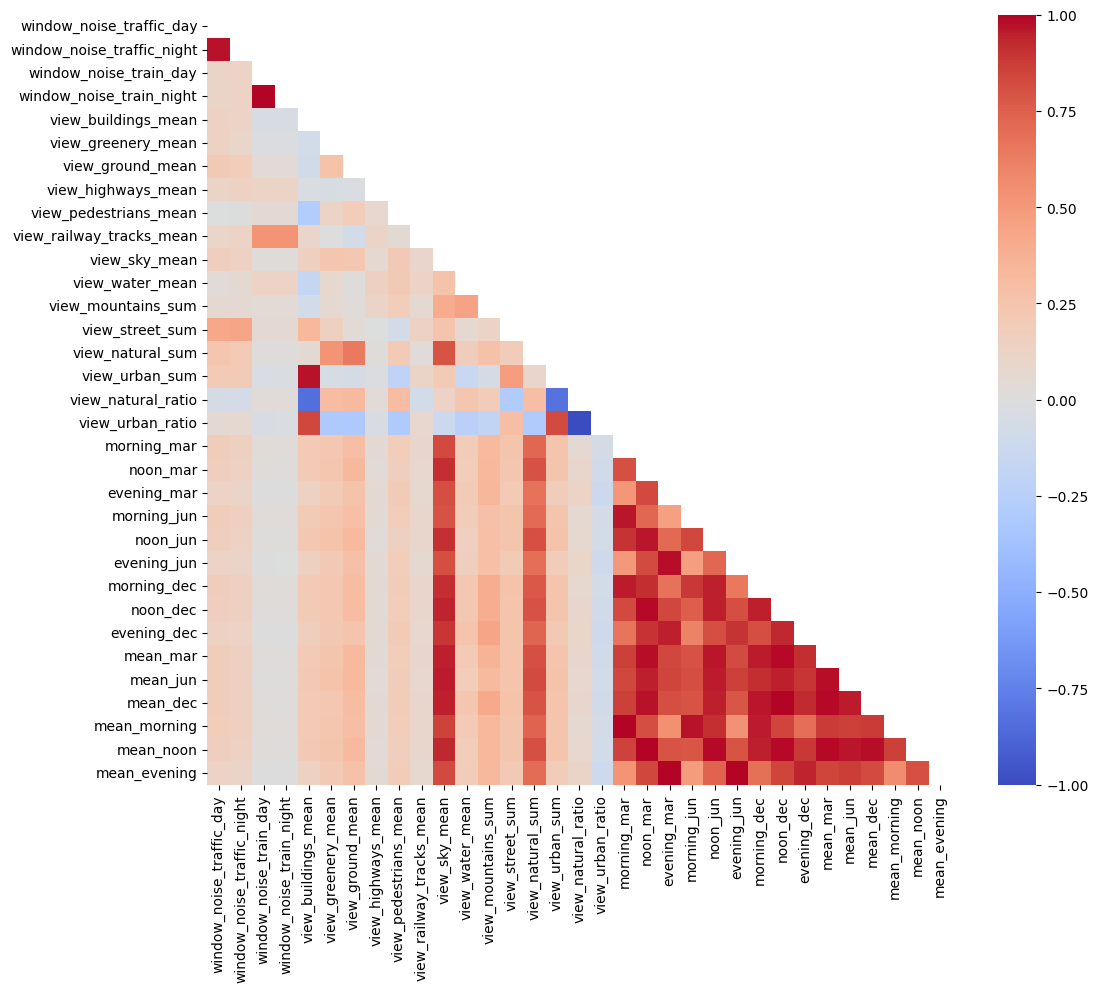

In [152]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_features_masked, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [153]:
corr_features_masked = corr_features_masked.abs().unstack().sort_values(ascending=False).reset_index()
corr_features_masked.rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}, inplace=True)
corr_features_masked = corr_features_masked[corr_features_masked['Variable 1'] != corr_features_masked['Variable 2']]
corr_features_masked.head(50)

,Variable 1,Variable 2,Correlation
0,view_natural_ratio,view_urban_ratio,1.000000
1,window_noise_train_day,window_noise_train_night,0.997768
2,morning_mar,mean_morning,0.996033
3,noon_dec,mean_dec,0.995289
4,evening_mar,mean_evening,0.994626
5,evening_jun,mean_evening,0.994228
6,noon_mar,mean_noon,0.994218
7,mean_mar,mean_dec,0.989205
8,noon_dec,mean_mar,0.986636
9,noon_mar,noon_dec,0.986298


In [154]:
corr_features_masked.head(100)

,Variable 1,Variable 2,Correlation
0,view_natural_ratio,view_urban_ratio,1.000000
1,window_noise_train_day,window_noise_train_night,0.997768
2,morning_mar,mean_morning,0.996033
3,noon_dec,mean_dec,0.995289
4,evening_mar,mean_evening,0.994626
...,...,...,...
95,evening_mar,mean_dec,0.815730
96,evening_jun,noon_dec,0.815047
97,morning_jun,mean_jun,0.814899
98,view_sky_mean,evening_mar,0.814790


In [155]:
corr_features_masked[corr_features_masked['Correlation'] < 0.92].head(20)

,Variable 1,Variable 2,Correlation
48,noon_mar,morning_dec,0.919469
49,view_sky_mean,morning_dec,0.917699
50,morning_dec,mean_jun,0.915841
51,view_sky_mean,noon_mar,0.914269
52,view_sky_mean,noon_jun,0.913128
53,noon_jun,mean_morning,0.906775
54,noon_mar,evening_dec,0.905655
55,evening_jun,evening_dec,0.902980
56,morning_mar,noon_jun,0.898901
57,evening_dec,mean_jun,0.897294


#### Dropping some high correlated variables

In [156]:
df_features.head()

,apartment_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,view_natural_sum,view_urban_sum,view_natural_ratio,view_urban_ratio,morning_mar,noon_mar,evening_mar,morning_jun,noon_jun,evening_jun,morning_dec,noon_dec,evening_dec,mean_mar,mean_jun,mean_dec,mean_morning,mean_noon,mean_evening
0,00024dcb907dc1671ef48af550271427,26.050232,17.786085,0.0,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.016660,0.000000,0.000000,5.309107e-04,0.064934,0.013940,0.716494,0.283506,1.213924,1.351526,0.896759,1.135133,1.292409,1.526104,0.607588,0.837305,0.265230,1.154070,1.317882,0.570041,0.985548,1.160413,0.896031
1,00048208e97e07b7b183718826929def,25.465895,17.790932,0.0,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.017772,0.000493,0.000071,1.419091e-03,0.034746,0.003847,0.839762,0.160238,1.000308,1.105115,1.197088,0.804514,0.909190,1.677251,0.506564,0.713128,0.315683,1.100837,1.130318,0.511792,0.770462,0.909144,1.063340
2,00048321bf465caba119f73d57093299,33.533112,28.146663,0.0,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.034343,0.000000,0.000506,8.415804e-03,0.058543,0.022389,0.782013,0.217987,1.094409,3.221745,2.800813,0.607570,2.007235,3.518316,1.040895,2.063384,0.977945,2.372322,2.044373,1.360741,0.914291,2.430788,2.432358
3,00075003b82a8cf375c274560aa6bc9c,27.666442,19.688055,0.0,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.019612,0.000000,0.000000,1.808636e-04,0.045470,0.006602,0.780343,0.219657,0.805975,1.462474,1.302101,0.701368,1.094519,2.104608,0.599384,1.001575,0.414049,1.190183,1.300165,0.671669,0.702243,1.186189,1.273586
4,000916099693de3f997973f552fdff07,21.522038,15.213498,0.0,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.008013,0.000000,0.000000,9.432771e-07,0.050300,0.000920,0.974020,0.025980,1.005287,0.991395,0.289898,0.843773,1.072992,0.411827,0.490027,0.589559,0.121464,0.762193,0.776197,0.400350,0.779696,0.884649,0.274397


In [157]:
df_feat_red = df_features.copy()

In [158]:
df_feat_red = df_feat_red.drop(columns=['mean_mar', 'mean_jun', 'mean_dec', 'morning_mar', 'morning_jun', 'morning_dec', 'noon_mar', 'noon_jun', 'noon_dec', 'evening_mar', 'evening_jun', 'evening_dec', 'view_natural_sum', 'view_urban_sum', 'view_natural_ratio', 'view_urban_ratio'])

In [159]:
df_feat_red.head()

,apartment_id,window_noise_traffic_day,window_noise_traffic_night,window_noise_train_day,window_noise_train_night,view_buildings_mean,view_greenery_mean,view_ground_mean,view_highways_mean,view_pedestrians_mean,view_railway_tracks_mean,view_sky_mean,view_water_mean,view_mountains_sum,view_street_sum,mean_morning,mean_noon,mean_evening
0,00024dcb907dc1671ef48af550271427,26.050232,17.786085,0.0,0.0,0.010573,0.014354,0.033920,0.0,0.002836,0.000000e+00,0.016660,0.000000,0.000000,5.309107e-04,0.985548,1.160413,0.896031
1,00048208e97e07b7b183718826929def,25.465895,17.790932,0.0,0.0,0.002223,0.002297,0.014112,0.0,0.000205,0.000000e+00,0.017772,0.000493,0.000071,1.419091e-03,0.770462,0.909144,1.063340
2,00048321bf465caba119f73d57093299,33.533112,28.146663,0.0,0.0,0.013962,0.011717,0.011977,0.0,0.000011,1.920943e-07,0.034343,0.000000,0.000506,8.415804e-03,0.914291,2.430788,2.432358
3,00075003b82a8cf375c274560aa6bc9c,27.666442,19.688055,0.0,0.0,0.004333,0.002894,0.022964,0.0,0.002088,0.000000e+00,0.019612,0.000000,0.000000,1.808636e-04,0.702243,1.186189,1.273586
4,000916099693de3f997973f552fdff07,21.522038,15.213498,0.0,0.0,0.000913,0.017949,0.024337,0.0,0.000006,0.000000e+00,0.008013,0.000000,0.000000,9.432771e-07,0.779696,0.884649,0.274397


In [160]:
df_feat_red.shape

(42207, 18)

In [161]:
corr_features2 = df_feat_red.select_dtypes(include='number').corr(method='spearman')

In [162]:
mask = np.triu(np.ones_like(corr_features2, dtype=bool))
corr_features_masked2 = corr_features2.mask(mask)

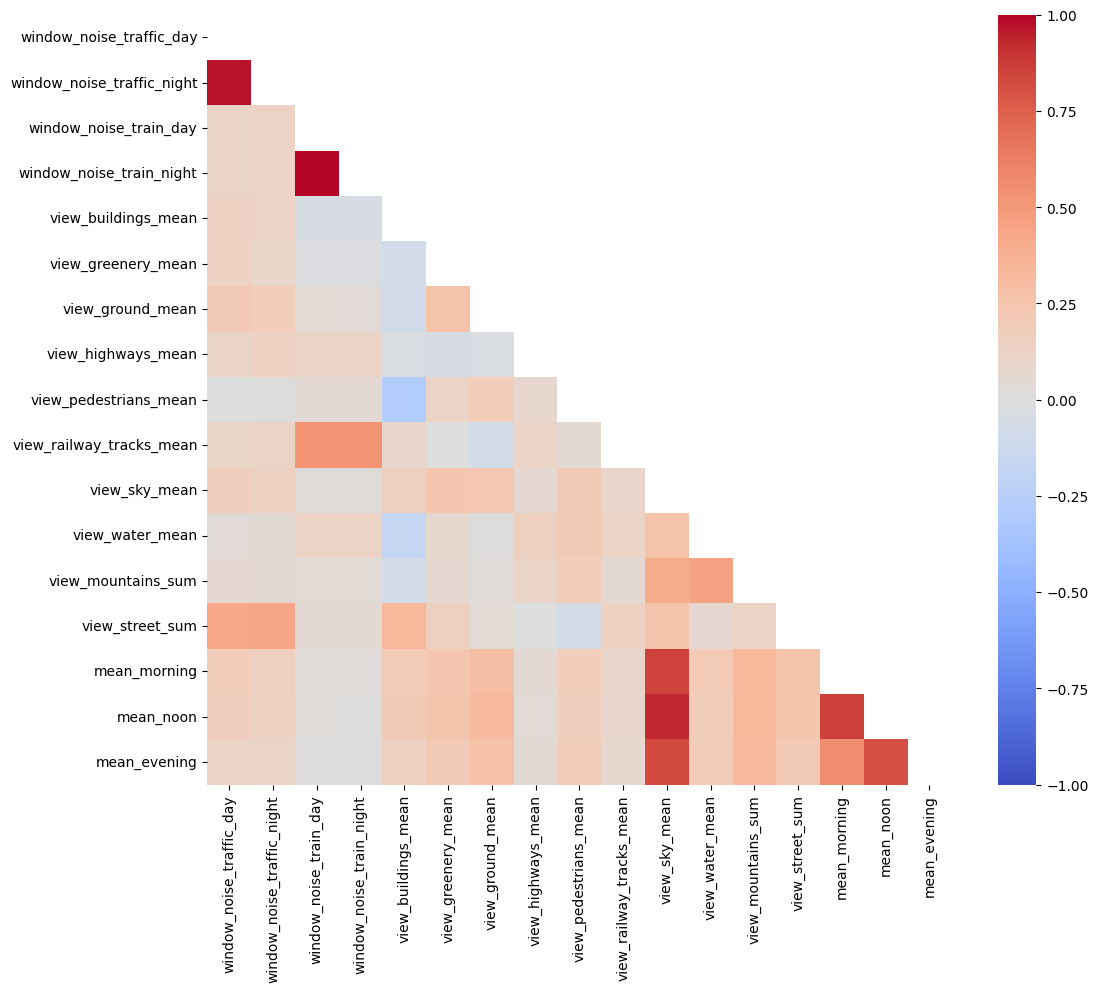

In [163]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_features_masked2, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [164]:
df_feat_red.to_csv('df_feat_red.csv', index=False)